# Part 1: London’s underground resilience
## I. Topological network

In this part, you will evaluate the resilience of the London’s underground through the removal of stations that can potentially make the underground vulnerable. Through the procedure outlined below you will investigate which are the stations that are most critical for the functioning of the underground, and which methodology is more appropriate to finding these stations

In [1]:
#import libraries
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter

In [2]:
#load the data
G = nx.read_graphml('london.graphml')

In [3]:
type(G)

networkx.classes.graph.Graph

In [4]:
print(nx.info(G))

Graph with 401 nodes and 467 edges


In [5]:
# number of connected components 
nx.number_connected_components(G)

#we don't have isolations, all the nodes in the system are connected

1

In [6]:
# To check node attributes:
list(G.nodes(data = True))[0]

#so we can see station name and coords in this file
#and the 'coords' are shown as string

('Wembley Park', {'coords': '(519316.5590174915, 186389.32981656672)'})

In [7]:
# since 'coords' tuples are stored as string (not able to plot), 
# we need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

In [8]:
# To check node attributes :
list(G.nodes(data = True))[0]

#now it's tuples

('Wembley Park', {'coords': (519316.5590174915, 186389.32981656672)})

In [9]:
#write a for loop to add the key of 'station_name' in it:
for i in list(G.nodes().keys()):
    G.nodes[i]["station_name"] = i 

list(G.nodes(data = True))[:2]

[('Wembley Park',
  {'coords': (519316.5590174915, 186389.32981656672),
   'station_name': 'Wembley Park'}),
 ('Kingsbury',
  {'coords': (519359.9688603217, 188721.22027255083),
   'station_name': 'Kingsbury'})]

In [10]:
# To check edges attributes:
list(G.edges(data = True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356})

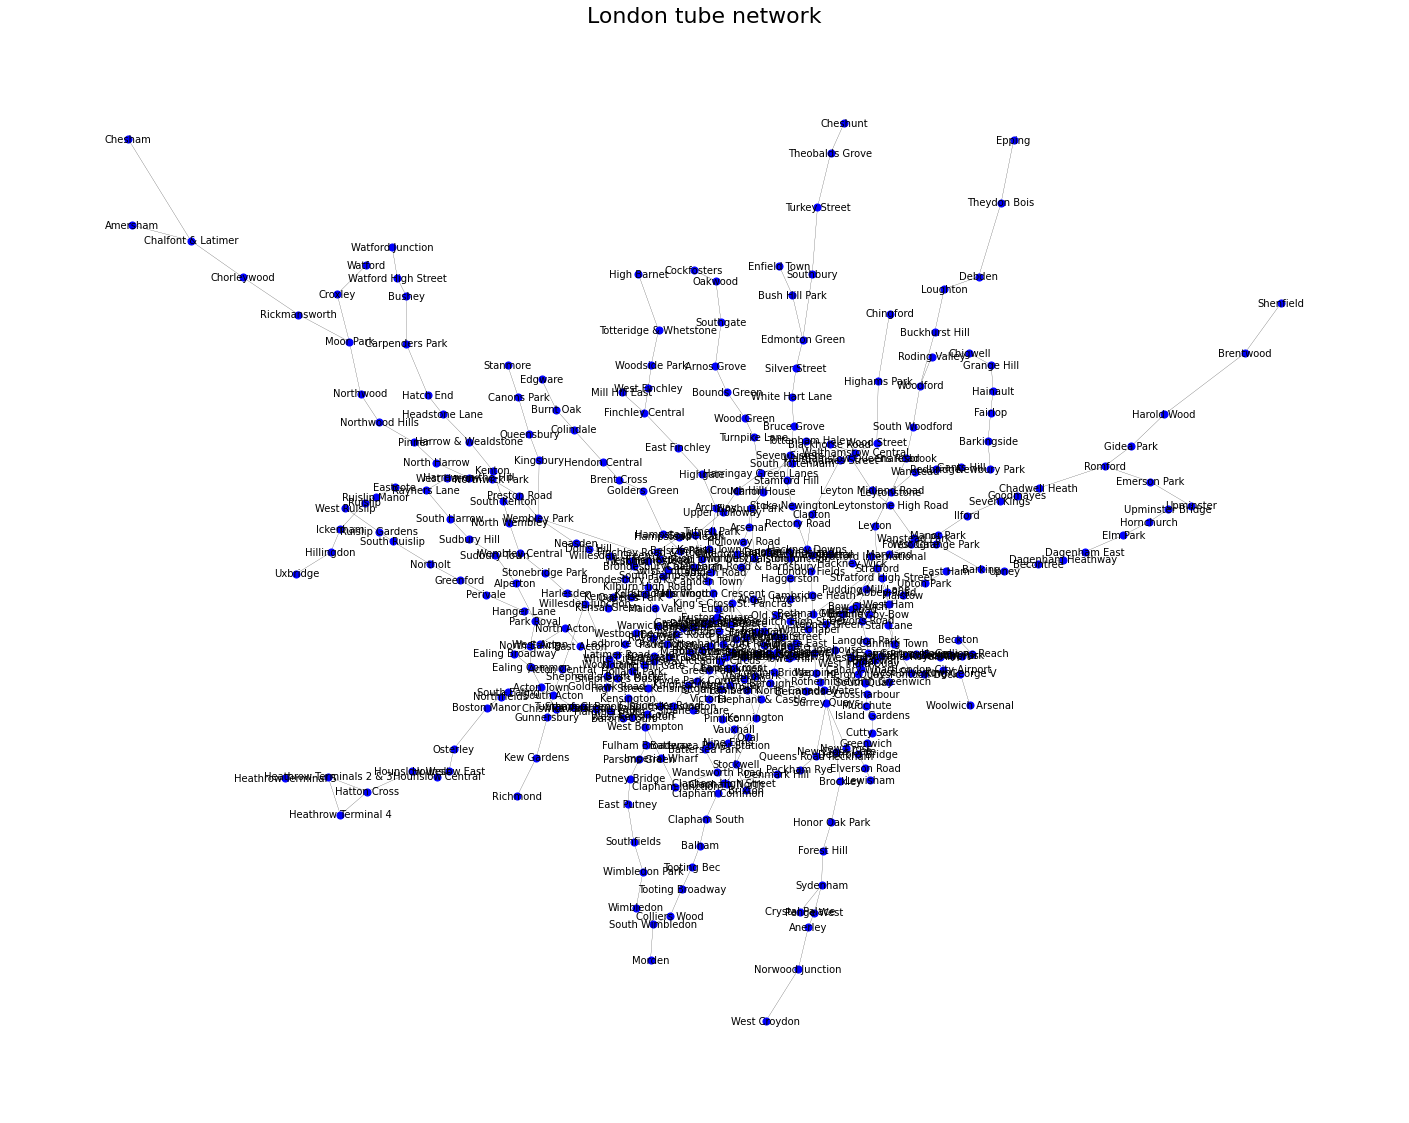

In [11]:
# Let's plot the tube network! 

# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

node_labels = nx.get_node_attributes(G, 'station_name')

pos = nx.get_node_attributes(G, 'coords') #not using spring_layout anymore, use the real coordinates

nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(G,pos, node_labels, font_size=10, font_color='black') #labels using the station names

plt.title("London tube network",fontsize=22)
plt.axis("off")
plt.show()


In [12]:
#check the edges as a dataframe
#We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(G)
df[0:10]

,source,target,length,flows,line_name
0,Wembley Park,Kingsbury,2916.771558,12356,Jubilee
1,Wembley Park,Neasden,2353.165938,6744,Jubilee
2,Wembley Park,Preston Road,1419.735166,36601,Metropolitan
3,Wembley Park,Finchley Road,7266.373927,55216,Metropolitan
4,Kingsbury,Queensbury,1245.995234,9419,Jubilee
5,Queensbury,Canons Park,1693.307343,6385,Jubilee
6,Canons Park,Stanmore,1419.669476,3624,Jubilee
7,Stratford,West Ham,1673.509515,91801,Jubilee
8,Stratford,Mile End,2805.001392,12010,Central
9,Stratford,Leyton,2131.342926,56082,Central


### I.1. Centrality measures:
Select **3 centrality measures** to characterise nodes, aiming at **identifying the most important nodes in this particular network**. In addition to **giving their definitions**, explain what do the measures mean **into the context of the underground**, and **why they will allow you to find the stations that are most crucial** for the functioning of the underground. Compute the measures for your nodes in the network, and give the **results in a table for the first 10 ranked nodes** for each of the 3 measures. (9 marks, 3 per measure)


#### Degree Centrality on nodes:
The degree of a node refers to the number of links connected to it. Let us plot the network again including this new piece of information:

In [13]:
# calculate the topological degree centrality using networkx function:
deg_london =nx.degree_centrality(G)  #the function
nx.set_node_attributes(G,dict(deg_london),'degree') #transfering the info to the nodes

In [14]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10].to_csv("Results/Topo_De_cen_top10.csv")
df_sorted[0:10]

,station_name,degree
Stratford,Stratford,0.0225
Bank and Monument,Bank and Monument,0.0200
King's Cross St. Pancras,King's Cross St. Pancras,0.0175
Baker Street,Baker Street,0.0175
Earl's Court,Earl's Court,0.0150
Oxford Circus,Oxford Circus,0.0150
Liverpool Street,Liverpool Street,0.0150
Waterloo,Waterloo,0.0150
Green Park,Green Park,0.0150
Canning Town,Canning Town,0.0150


* From the result we can see that Stratford has the highest degree centrality which indicates that Stratford station is the most influencial station in London tube network that has the most connection to other stations. In addition, degree centrality is regardless of weight which means that the most powerful station is Stratford station in London tube network.

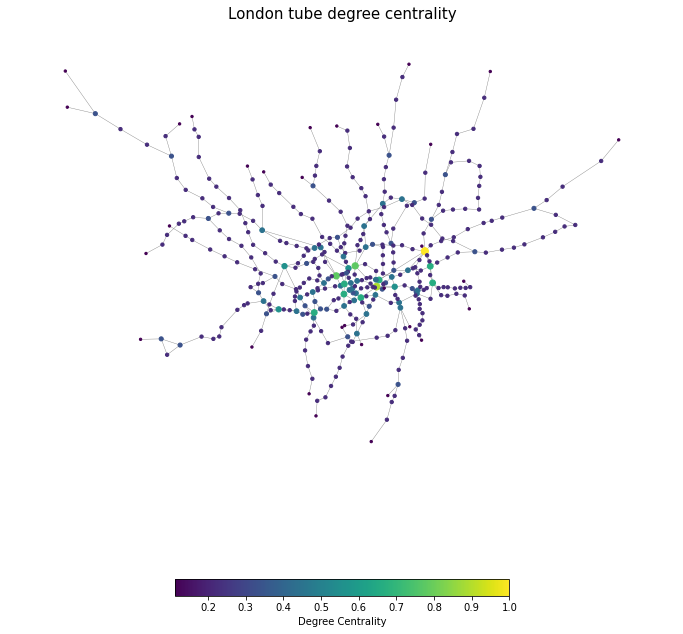

In [15]:
# Lets set colour and size of nodes according to betweenness values
degree_values=[(i[1]['degree']) for i in G.nodes(data=True)]

deg_color=[(i[1]['degree']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['degree']/(max(degree_values)))*50 for i in G.nodes(data=True)]



# Plot graph

pos=pos  #not using spring_layout anymore, use the real coordinates defined in previous cell

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube degree centrality",fontsize=15)
plt.show()

* As we can see from the graph above, in general, stations close to the centre of the network are with higher degree centrality reletively. the station with largest degree centrality is located in the northwest of the centre tube network.
* Also in the centre of the network, the edges are shorter than those in the edge of the network.

#### Betweenness Centralityon on nodes:
The betweenness centrality of a vertex corresponds to the number of shortest paths passing through it among all pairs. 

Edge betweennness is defined in a similar, where the edge is within the shortest path.

Betweenness centrality represents the broker stations in the system, the bridge that connecting two clusters.
* Betweenness centrality is a way of detecting the amount of influence a node has over the flow of information in a graph.

In [16]:
### Topological betweenness centrality (not adding the weight):

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(G, normalized=False)  #not normalized
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_t
Stratford,Stratford,23768.093434
Bank and Monument,Bank and Monument,23181.058947
Liverpool Street,Liverpool Street,21610.387049
King's Cross St. Pancras,King's Cross St. Pancras,20373.521465
Waterloo,Waterloo,19464.882323
Green Park,Green Park,17223.622114
Euston,Euston,16624.275469
Westminster,Westminster,16226.155916
Baker Street,Baker Street,15287.107612
Finchley Road,Finchley Road,13173.758009


* As the result shown, the Stratford station has the highest betweenness centrality that plays a role of broker or bridge in London tube network system that connecting different stations. This means that Stratford station linked to the highest number of pair of stations in London tube network, thereofre, we might say the Stratford station would be the most busy station since the passenger traveling by tube has a highest probabily to pass through this station.
* Also, if the Stratford station is closed, this may cause disconnection of traveling by tube, which means passengers have highest probability that their shortest path from Origin to Destination can not be made because of the disconnection and need to take more time traveling by tube.


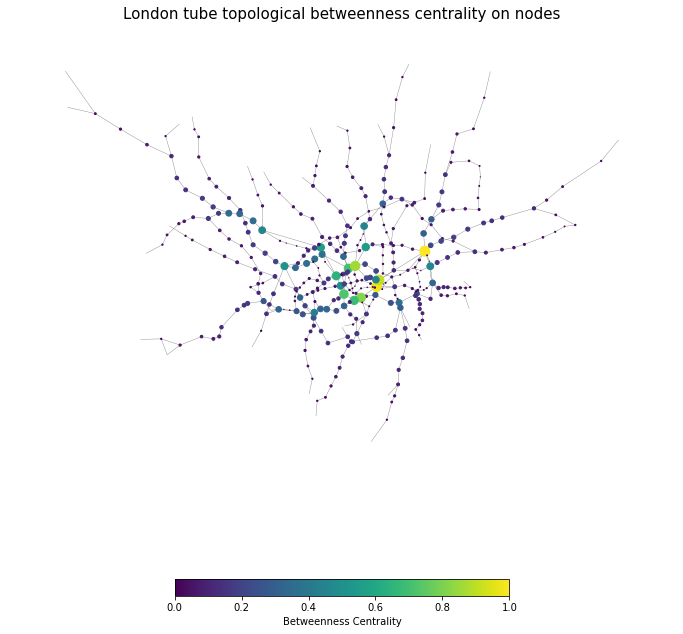

In [17]:
# Lets set colour and size of nodes according to betweenness values
betweenness_t_values=[(i[1]['betweenness_t']) for i in G.nodes(data=True)]

bet_t_color=[(i[1]['betweenness_t']/max(betweenness_t_values)) for i in G.nodes(data=True)]
bet_t_size=[(i[1]['betweenness_t']/max(betweenness_t_values))*100 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological betweenness centrality on nodes",fontsize=15)
plt.show()

* The higher betweenness centrality are located mostly in the middle of the netwrk where is the city of London. This make sense because there are more activities are taken place in the centre of the city, for example, works, shopping and traveler visiting attractions. Higher demand of stations to be efficient that can allow passengers travel to more different places, this result in a higher density of stations in the centre of the London and more transfer lines in the stations located in the centre of the network or the inner tube zone.

* However, Stratford station is not located in the centre of the network but having the highest betweenness centrality. This can be explained by the highest degree centrality of Stratford station that more transfer lines connected to Stratford makes more short cuts through this station.

may because of that this station is revamped for the 2012 Olympic Games of shopping and leisure hub
there is the vast Westfield Stratford City mall
Queen Elizabeth Olympic Park
 the London Stadium

#### Closeness Centralityon nodes:
The mean geodesic distance of node  to all other nodes

have influentail power.

In [18]:
#topological closeness centrality (without weight)
clos_t=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

,station_name,closeness_t
Green Park,Green Park,0.114778
Bank and Monument,Bank and Monument,0.113572
King's Cross St. Pancras,King's Cross St. Pancras,0.113443
Westminster,Westminster,0.112549
Waterloo,Waterloo,0.112265
Oxford Circus,Oxford Circus,0.111204
Bond Street,Bond Street,0.110988
Farringdon,Farringdon,0.110742
Angel,Angel,0.110742
Moorgate,Moorgate,0.110314


The 'Green Park' station has the highest closeness centrality in London tube network, this demonstrate that 'Green Park' station has the shortest path to all the other stations. This also saying the 'Green Park' station is in the centre of the network and easy to reach every other stations in a relatively short path.

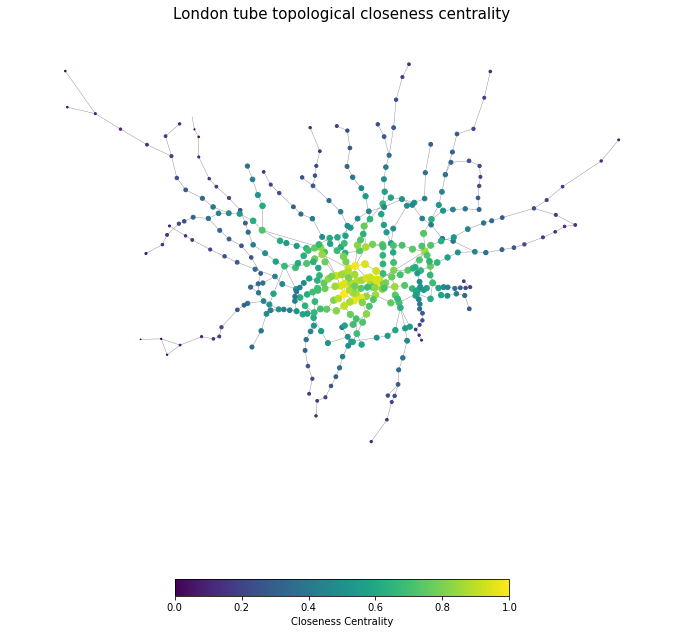

In [19]:
# Lets set color and width of nodes according to the closeness values
clos_t_val=[(i[1]['closeness_t']) for i in G.nodes(data=True)]

closs_t_color=[(i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val)) for i in G.nodes(data=True)]
closs_t_size=[((i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val))*50) for i in G.nodes(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_t_color,
        node_size= closs_t_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological closeness centrality",fontsize=15)
plt.show()

* Not surprisingly, the higher closeness centrality is concentrated in the centre of the network where is the City of London. This can be illustrated by the concentration of avtivities of population. More lines and stations are built in the centre of London, more options from one place to another, and more easy to find a short cut to reach the destination. Unlike the stations on the margin end of each line that only have one direction to go, no options for short cut and take more time for transfering.

### I.2. Impact measures:
Find **2 different measures** to **evaluate the impact of the node removal on the network**. These are global measures referring to the whole network and not to particular nodes or links. Explain whether these two measures to evaluate the impact are specific to the London underground, or whether they would also be useful to evaluate the resilience of any other network. (10 marks, 5 per measure)

#### 1.Gaint component

#### 2.avg clustering coefficient

### I.3. Node removal:
For each of the centrality measures selected in 1.- remove at least 10 nodes following two different strategies. A) non-sequential removal: using your table in 1.- remove 1 node at a time following the rank in the table, i.e. from the most important one to the 10th most important one. After each removal, evaluate the impact of the removal using your two measures in 2.-, and proceed until you have removed at least 10 nodes. B) sequential: remove the highest ranked node and evaluate the impact using the 2 measures. After removal, re-compute the centrality measure. Remove the highest ranked node in the new network and evaluate the impact. Continue until removing at least ten nodes. Report the results of the 2 strategies in one plot, and critically discuss the following: which centrality measure reflects better the importance of a station for the functioning of the underground, which strategy is more effective at studying resilience, and which impact measure is better at assessing the damage after node removal.

#### original value of two impact measures without removing any nodes:

In [20]:
# number of connected components 
nx.number_connected_components(G)

1

In [21]:
# let's measure the clustering coefficient
c = nx.clustering(G)
print(type(c))
#results: a dictionary of list about (node of the graph, clustering coefficient number)
 
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030382377389858668


In [22]:
# To check node attributes :
list(G.nodes(data = True))[0]

('Wembley Park',
 {'coords': (519316.5590174915, 186389.32981656672),
  'station_name': 'Wembley Park',
  'degree': 0.01,
  'betweenness_t': 10780.813492063491,
  'closeness_t': 0.09465215333648841})

In [23]:
# To check edges attributes:
list(G.edges(data = True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356})

#### Strategy A (non-sequential removel):
For each of the centrality measures selected in 1.- remove 1 node at a time following the rank in the table, from the most important one to the 10th most important one.

After each removal, evaluate the impact of the removal using your two measures in 2.- and proceed until you have removed at least 10 nodes.

##### Degree Centrality removal

In [24]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

degree_remove_list = df.sort_values(["degree"], ascending=False)
degree_remove_list[0:10]

,station_name,degree
Stratford,Stratford,0.0225
Bank and Monument,Bank and Monument,0.0200
King's Cross St. Pancras,King's Cross St. Pancras,0.0175
Baker Street,Baker Street,0.0175
Earl's Court,Earl's Court,0.0150
Oxford Circus,Oxford Circus,0.0150
Liverpool Street,Liverpool Street,0.0150
Waterloo,Waterloo,0.0150
Green Park,Green Park,0.0150
Canning Town,Canning Town,0.0150


In [25]:
#remove the first station in degree centrality rank
#make a copy of the graph
GA_D = G.copy()
print(nx.info(GA_D))  #before

#GA_D: Graph using Strategy A to reomve according to the Degree centrality
GA_D.remove_node("Stratford")

print(nx.info(GA_D))  #after

Graph with 401 nodes and 467 edges
Graph with 400 nodes and 458 edges


In [26]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GA_D)}')

# let's subset this graph to the largest connected component (focus on the largest component)
GA_cc = sorted(nx.connected_components(GA_D), key=len, reverse=True)   #sort it from largest to smallest
Gsub = G.subgraph(GA_cc[0])  #create a subgraph only about the first largest component
             #GA_cc[0]: list of nodes

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(GA_D.nodes)) * 100

#get some info of this subgraph
lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
print(nx.info(Gsub))
print(f'Number of connected components:{nx.number_connected_components(Gsub)}')


# let's measure the clustering coefficient
c = nx.clustering(GA_D)
print(type(c))
#results: a dictionary of list about (node of the graph, clustering coefficient number)
 
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:3
Largest Connected Compenent:94.75%
Graph with 379 nodes and 438 edges
Number of connected components:1
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030624999999999982


In [27]:
#Remove the second station from Degree centrality list
print(nx.info(GA_D))  #before
GA_D.remove_node("Bank and Monument")

print(nx.info(GA_D))  #after

Graph with 400 nodes and 458 edges
Graph with 399 nodes and 450 edges


In [28]:
# number of connected components
print(f'Number of connected components in network:{nx.number_connected_components(GA_D)}')

# let's subset this graph to the largest connected component (focus on the largest component)
GA_cc = sorted(nx.connected_components(GA_D), key=len, reverse=True)   #sort it from largest to smallest
Gsub = G.subgraph(GA_cc[0])  #create a subgraph only about the first largest component
             #GA_cc[0]: list of nodes

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(GA_D.nodes)) * 100

#get some info of this subgraph
lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
print(nx.info(Gsub))
print(f'Number of connected components in largest component:{nx.number_connected_components(Gsub)}')


# let's measure the clustering coefficient
c = nx.clustering(GA_D)
print(type(c))
#results: a dictionary of list about (node of the graph, clustering coefficient number)
 
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:3
Largest Connected Compenent:94.74%
Graph with 378 nodes and 430 edges
Number of connected components in largest component:1
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030027449576321738


In [29]:
#Remove the third station from Degree centrality list
print(nx.info(GA_D))  #before
GA_D.remove_node("King's Cross St. Pancras")

print(nx.info(GA_D))  #after

Graph with 399 nodes and 450 edges
Graph with 398 nodes and 443 edges


In [30]:
# number of connected components
print(f'Number of connected components in network:{nx.number_connected_components(GA_D)}')

# let's subset this graph to the largest connected component (focus on the largest component)
GA_cc = sorted(nx.connected_components(GA_D), key=len, reverse=True)   #sort it from largest to smallest
Gsub = G.subgraph(GA_cc[0])  #create a subgraph only about the first largest component
             #GA_cc[0]: list of nodes

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(GA_D.nodes)) * 100

#get some info of this subgraph
lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
print(nx.info(Gsub))
print(f'Number of connected components in largest component:{nx.number_connected_components(Gsub)}')


# let's measure the clustering coefficient
c = nx.clustering(GA_D)
print(type(c))
#results: a dictionary of list about (node of the graph, clustering coefficient number)
 
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:3
Largest Connected Compenent:94.72%
Graph with 377 nodes and 423 edges
Number of connected components in largest component:1
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030270399617133268


In [31]:
#Remove the fourth station from Degree centrality list
print(nx.info(GA_D))  #before
GA_D.remove_node("Baker Street")

print(nx.info(GA_D))  #after

Graph with 398 nodes and 443 edges
Graph with 397 nodes and 436 edges


In [32]:
# number of connected components
print(f'Number of connected components in network:{nx.number_connected_components(GA_D)}')

# let's subset this graph to the largest connected component (focus on the largest component)
GA_cc = sorted(nx.connected_components(GA_D), key=len, reverse=True)   #sort it from largest to smallest
Gsub = G.subgraph(GA_cc[0])  #create a subgraph only about the first largest component
             #GA_cc[0]: list of nodes

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(GA_D.nodes)) * 100

#get some info of this subgraph
lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
print(nx.info(Gsub))
print(f'Number of connected components in largest component:{nx.number_connected_components(Gsub)}')


# let's measure the clustering coefficient
c = nx.clustering(GA_D)
print(type(c))
#results: a dictionary of list about (node of the graph, clustering coefficient number)
 
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:4
Largest Connected Compenent:94.21%
Graph with 374 nodes and 415 edges
Number of connected components in largest component:1
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Heathrow Terminal 4', 1.0)]
avg clustering coefficient: 0.027287993282955475


In [33]:
#Remove the fifth station from Degree centrality list
print(nx.info(GA_D))  #before
GA_D.remove_node("Earl's Court")

print(nx.info(GA_D))  #after

Graph with 397 nodes and 436 edges
Graph with 396 nodes and 430 edges


In [34]:
# number of connected components
print(f'Number of connected components in network:{nx.number_connected_components(GA_D)}')

# let's subset this graph to the largest connected component (focus on the largest component)
GA_cc = sorted(nx.connected_components(GA_D), key=len, reverse=True)   #sort it from largest to smallest
Gsub = G.subgraph(GA_cc[0])  #create a subgraph only about the first largest component
             #GA_cc[0]: list of nodes

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(GA_D.nodes)) * 100

#get some info of this subgraph
lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
print(nx.info(Gsub))
print(f'Number of connected components in largest component:{nx.number_connected_components(Gsub)}')


# let's measure the clustering coefficient
c = nx.clustering(GA_D)
print(type(c))
#results: a dictionary of list about (node of the graph, clustering coefficient number)
 
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:4
Largest Connected Compenent:94.19%
Graph with 373 nodes and 409 edges
Number of connected components in largest component:1
<class 'dict'>
[('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Heathrow Terminal 4', 1.0), ('Bond Street', 0.3333333333333333)]
avg clustering coefficient: 0.020538720538720537


In [35]:
#Remove the sixth station from Degree centrality list
print(nx.info(GA_D))  #before
GA_D.remove_node("Oxford Circus")

print(nx.info(GA_D))  #after

Graph with 396 nodes and 430 edges
Graph with 395 nodes and 424 edges


In [36]:
# number of connected components
print(f'Number of connected components in network:{nx.number_connected_components(GA_D)}')

# let's subset this graph to the largest connected component (focus on the largest component)
GA_cc = sorted(nx.connected_components(GA_D), key=len, reverse=True)   #sort it from largest to smallest
Gsub = G.subgraph(GA_cc[0])  #create a subgraph only about the first largest component
             #GA_cc[0]: list of nodes

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(GA_D.nodes)) * 100

#get some info of this subgraph
lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
print(nx.info(Gsub))
print(f'Number of connected components in largest component:{nx.number_connected_components(Gsub)}')


# let's measure the clustering coefficient
c = nx.clustering(GA_D)
print(type(c))
#results: a dictionary of list about (node of the graph, clustering coefficient number)
 
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:5
Largest Connected Compenent:93.92%
Graph with 371 nodes and 403 edges
Number of connected components in largest component:1
<class 'dict'>
[('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Heathrow Terminal 4', 1.0), ('Westferry', 0.3333333333333333)]
avg clustering coefficient: 0.019071729957805903


In [37]:
#Remove the seventh station from Degree centrality list
print(nx.info(GA_D))  #before
GA_D.remove_node("Liverpool Street")

print(nx.info(GA_D))  #after

Graph with 395 nodes and 424 edges
Graph with 394 nodes and 420 edges


In [38]:
# number of connected components
print(f'Number of connected components in network:{nx.number_connected_components(GA_D)}')

# let's subset this graph to the largest connected component (focus on the largest component)
GA_cc = sorted(nx.connected_components(GA_D), key=len, reverse=True)   #sort it from largest to smallest
Gsub = G.subgraph(GA_cc[0])  #create a subgraph only about the first largest component
             #GA_cc[0]: list of nodes

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(GA_D.nodes)) * 100

#get some info of this subgraph
lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
print(nx.info(Gsub))
print(f'Number of connected components in largest component:{nx.number_connected_components(Gsub)}')


# let's measure the clustering coefficient
c = nx.clustering(GA_D)
print(type(c))
#results: a dictionary of list about (node of the graph, clustering coefficient number)
 
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:6
Largest Connected Compenent:92.64%
Graph with 365 nodes and 395 edges
Number of connected components in largest component:1
<class 'dict'>
[('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Heathrow Terminal 4', 1.0), ('Westferry', 0.3333333333333333)]
avg clustering coefficient: 0.019120135363790182


In [39]:
#Remove the eighth station from Degree centrality list
print(nx.info(GA_D))  #before
GA_D.remove_node("Waterloo")

print(nx.info(GA_D))  #after

Graph with 394 nodes and 420 edges
Graph with 393 nodes and 415 edges


In [40]:
# number of connected components
print(f'Number of connected components in network:{nx.number_connected_components(GA_D)}')

# let's subset this graph to the largest connected component (focus on the largest component)
GA_cc = sorted(nx.connected_components(GA_D), key=len, reverse=True)   #sort it from largest to smallest
Gsub = G.subgraph(GA_cc[0])  #create a subgraph only about the first largest component
             #GA_cc[0]: list of nodes

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(GA_D.nodes)) * 100

#get some info of this subgraph
lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
print(nx.info(Gsub))
print(f'Number of connected components in largest component:{nx.number_connected_components(Gsub)}')


# let's measure the clustering coefficient
c = nx.clustering(GA_D)
print(type(c))
#results: a dictionary of list about (node of the graph, clustering coefficient number)
 
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:6
Largest Connected Compenent:92.62%
Graph with 364 nodes and 390 edges
Number of connected components in largest component:1
<class 'dict'>
[('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Heathrow Terminal 4', 1.0), ('Westferry', 0.3333333333333333)]
avg clustering coefficient: 0.018066157760814248


In [41]:
#Remove the ninth station from Degree centrality list
print(nx.info(GA_D))  #before
GA_D.remove_node("Green Park")

print(nx.info(GA_D))  #after

Graph with 393 nodes and 415 edges
Graph with 392 nodes and 410 edges


In [42]:
# number of connected components
print(f'Number of connected components in network:{nx.number_connected_components(GA_D)}')

# let's subset this graph to the largest connected component (focus on the largest component)
GA_cc = sorted(nx.connected_components(GA_D), key=len, reverse=True)   #sort it from largest to smallest
Gsub = G.subgraph(GA_cc[0])  #create a subgraph only about the first largest component
             #GA_cc[0]: list of nodes

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(GA_D.nodes)) * 100

#get some info of this subgraph
lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
print(nx.info(Gsub))
print(f'Number of connected components in largest component:{nx.number_connected_components(Gsub)}')


# let's measure the clustering coefficient
c = nx.clustering(GA_D)
print(type(c))
#results: a dictionary of list about (node of the graph, clustering coefficient number)
 
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:6
Largest Connected Compenent:92.60%
Graph with 363 nodes and 385 edges
Number of connected components in largest component:1
<class 'dict'>
[('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Piccadilly Circus', 1.0), ('Heathrow Terminal 4', 1.0)]
avg clustering coefficient: 0.019812925170068024


In [43]:
#Remove the ninth station from Degree centrality list
print(nx.info(GA_D))  #before
GA_D.remove_node("Canning Town")

print(nx.info(GA_D))  #after

Graph with 392 nodes and 410 edges
Graph with 391 nodes and 404 edges


In [44]:
# number of connected components
print(f'Number of connected components in network:{nx.number_connected_components(GA_D)}')

# let's subset this graph to the largest connected component (focus on the largest component)
GA_cc = sorted(nx.connected_components(GA_D), key=len, reverse=True)   #sort it from largest to smallest
Gsub = G.subgraph(GA_cc[0])  #create a subgraph only about the first largest component
             #GA_cc[0]: list of nodes

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(GA_D.nodes)) * 100

#get some info of this subgraph
lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
print(nx.info(Gsub))
print(f'Number of connected components in largest component:{nx.number_connected_components(Gsub)}')


# let's measure the clustering coefficient
c = nx.clustering(GA_D)
print(type(c))
#results: a dictionary of list about (node of the graph, clustering coefficient number)
 
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:8
Largest Connected Compenent:89.26%
Graph with 349 nodes and 368 edges
Number of connected components in largest component:1
<class 'dict'>
[('Chiswick Park', 1.0), ('Mornington Crescent', 1.0), ('Piccadilly Circus', 1.0), ('Heathrow Terminal 4', 1.0), ('Westferry', 0.3333333333333333)]
avg clustering coefficient: 0.016879795396419435


##### Betweenness Centrality

In [45]:
### Topological betweenness centrality (not adding the weight):

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(G, normalized=False)  #not normalized
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_t
Stratford,Stratford,23768.093434
Bank and Monument,Bank and Monument,23181.058947
Liverpool Street,Liverpool Street,21610.387049
King's Cross St. Pancras,King's Cross St. Pancras,20373.521465
Waterloo,Waterloo,19464.882323
Green Park,Green Park,17223.622114
Euston,Euston,16624.275469
Westminster,Westminster,16226.155916
Baker Street,Baker Street,15287.107612
Finchley Road,Finchley Road,13173.758009


In [46]:
#remove the first station in degree centrality rank
#make a copy of the graph
GA_B = G.copy()
print(nx.info(GA_B))  #before

#GA_B: Graph using Strategy A to reomve according to the Betweenness centrality
GA_B.remove_node("Stratford")

print(nx.info(GA_B))  #after

Graph with 401 nodes and 467 edges
Graph with 400 nodes and 458 edges


In [47]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GA_B)}')

# let's subset this graph to the largest connected component (focus on the largest component)
GA_cc = sorted(nx.connected_components(GA_B), key=len, reverse=True)   #sort it from largest to smallest
Gsub = G.subgraph(GA_cc[0])  #create a subgraph only about the first largest component
             #GA_cc[0]: list of nodes

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(GA_B.nodes)) * 100

#get some info of this subgraph
lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
print(nx.info(Gsub))
print(f'Number of connected components:{nx.number_connected_components(Gsub)}')


# let's measure the clustering coefficient
c = nx.clustering(GA_B)
print(type(c))
#results: a dictionary of list about (node of the graph, clustering coefficient number)
 
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:3
Largest Connected Compenent:94.75%
Graph with 379 nodes and 438 edges
Number of connected components:1
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030624999999999982


In [48]:
#remove the second station in degree centrality rank
print(nx.info(GA_B))  #before
GA_B.remove_node("Bank and Monument")
print(nx.info(GA_B))  #after

Graph with 400 nodes and 458 edges
Graph with 399 nodes and 450 edges


In [49]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GA_B)}')

# let's subset this graph to the largest connected component (focus on the largest component)
GA_cc = sorted(nx.connected_components(GA_B), key=len, reverse=True)   #sort it from largest to smallest
Gsub = G.subgraph(GA_cc[0])  #create a subgraph only about the first largest component
             #GA_cc[0]: list of nodes

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(GA_B.nodes)) * 100

#get some info of this subgraph
lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
print(nx.info(Gsub))
print(f'Number of connected components:{nx.number_connected_components(Gsub)}')


# let's measure the clustering coefficient
c = nx.clustering(GA_B)
print(type(c))
#results: a dictionary of list about (node of the graph, clustering coefficient number)
 
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:3
Largest Connected Compenent:94.74%
Graph with 378 nodes and 430 edges
Number of connected components:1
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030027449576321738


In [50]:
#remove the third station in degree centrality rank
print(nx.info(GA_B))  #before
GA_B.remove_node("Liverpool Street")
print(nx.info(GA_B))  #after

Graph with 399 nodes and 450 edges
Graph with 398 nodes and 446 edges


In [51]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GA_B)}')

# let's subset this graph to the largest connected component (focus on the largest component)
GA_cc = sorted(nx.connected_components(GA_B), key=len, reverse=True)   #sort it from largest to smallest
Gsub = G.subgraph(GA_cc[0])  #create a subgraph only about the first largest component
             #GA_cc[0]: list of nodes

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(GA_B.nodes)) * 100

#get some info of this subgraph
lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
print(nx.info(Gsub))
print(f'Number of connected components:{nx.number_connected_components(Gsub)}')


# let's measure the clustering coefficient
c = nx.clustering(GA_B)
print(type(c))
#results: a dictionary of list about (node of the graph, clustering coefficient number)
 
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:3
Largest Connected Compenent:94.72%
Graph with 377 nodes and 426 edges
Number of connected components:1
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030102895429528577


In [52]:
#remove the fourth station in degree centrality rank
print(nx.info(GA_B))  #before
GA_B.remove_node("King's Cross St. Pancras")
print(nx.info(GA_B))  #after

Graph with 398 nodes and 446 edges
Graph with 397 nodes and 439 edges


In [53]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GA_B)}')

# let's subset this graph to the largest connected component (focus on the largest component)
GA_cc = sorted(nx.connected_components(GA_B), key=len, reverse=True)   #sort it from largest to smallest
Gsub = G.subgraph(GA_cc[0])  #create a subgraph only about the first largest component
             #GA_cc[0]: list of nodes

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(GA_B.nodes)) * 100

#get some info of this subgraph
lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
print(nx.info(Gsub))
print(f'Number of connected components:{nx.number_connected_components(Gsub)}')


# let's measure the clustering coefficient
c = nx.clustering(GA_B)
print(type(c))
#results: a dictionary of list about (node of the graph, clustering coefficient number)
 
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:4
Largest Connected Compenent:93.45%
Graph with 371 nodes and 415 edges
Number of connected components:1
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030346647475110934


In [54]:
#remove the fifth station in degree centrality rank
print(nx.info(GA_B))  #before
GA_B.remove_node("Waterloo")
print(nx.info(GA_B))  #after

Graph with 397 nodes and 439 edges
Graph with 396 nodes and 434 edges


In [55]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GA_B)}')

# let's subset this graph to the largest connected component (focus on the largest component)
GA_cc = sorted(nx.connected_components(GA_B), key=len, reverse=True)   #sort it from largest to smallest
Gsub = G.subgraph(GA_cc[0])  #create a subgraph only about the first largest component
             #GA_cc[0]: list of nodes

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(GA_B.nodes)) * 100

#get some info of this subgraph
lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
print(nx.info(Gsub))
print(f'Number of connected components:{nx.number_connected_components(Gsub)}')


# let's measure the clustering coefficient
c = nx.clustering(GA_B)
print(type(c))
#results: a dictionary of list about (node of the graph, clustering coefficient number)
 
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:4
Largest Connected Compenent:93.43%
Graph with 370 nodes and 410 edges
Number of connected components:1
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.029329004329004316


In [56]:
#remove the sixth station in degree centrality rank
print(nx.info(GA_B))  #before
GA_B.remove_node("Green Park")
print(nx.info(GA_B))  #after

Graph with 396 nodes and 434 edges
Graph with 395 nodes and 428 edges


In [57]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GA_B)}')

# let's subset this graph to the largest connected component (focus on the largest component)
GA_cc = sorted(nx.connected_components(GA_B), key=len, reverse=True)   #sort it from largest to smallest
Gsub = G.subgraph(GA_cc[0])  #create a subgraph only about the first largest component
             #GA_cc[0]: list of nodes

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(GA_B.nodes)) * 100

#get some info of this subgraph
lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
print(nx.info(Gsub))
print(f'Number of connected components:{nx.number_connected_components(Gsub)}')


# let's measure the clustering coefficient
c = nx.clustering(GA_B)
print(type(c))
#results: a dictionary of list about (node of the graph, clustering coefficient number)
 
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:4
Largest Connected Compenent:93.42%
Graph with 369 nodes and 404 edges
Number of connected components:1
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.028306208559373106


In [58]:
#remove the seventh station in degree centrality rank
print(nx.info(GA_B))  #before
GA_B.remove_node("Euston")
print(nx.info(GA_B))  #after

Graph with 395 nodes and 428 edges
Graph with 394 nodes and 424 edges


In [59]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GA_B)}')

# let's subset this graph to the largest connected component (focus on the largest component)
GA_cc = sorted(nx.connected_components(GA_B), key=len, reverse=True)   #sort it from largest to smallest
Gsub = G.subgraph(GA_cc[0])  #create a subgraph only about the first largest component
             #GA_cc[0]: list of nodes

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(GA_B.nodes)) * 100

#get some info of this subgraph
lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
print(nx.info(Gsub))
print(f'Number of connected components:{nx.number_connected_components(Gsub)}')


# let's measure the clustering coefficient
c = nx.clustering(GA_B)
print(type(c))
#results: a dictionary of list about (node of the graph, clustering coefficient number)
 
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:5
Largest Connected Compenent:87.82%
Graph with 346 nodes and 379 edges
Number of connected components:1
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Marylebone', 1.0), ('Heathrow Terminal 4', 1.0)]
avg clustering coefficient: 0.02499395697365239


In [60]:
#remove the eighth station in degree centrality rank
print(nx.info(GA_B))  #before
GA_B.remove_node("Westminster")
print(nx.info(GA_B))  #after

Graph with 394 nodes and 424 edges
Graph with 393 nodes and 422 edges


In [61]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GA_B)}')

# let's subset this graph to the largest connected component (focus on the largest component)
GA_cc = sorted(nx.connected_components(GA_B), key=len, reverse=True)   #sort it from largest to smallest
Gsub = G.subgraph(GA_cc[0])  #create a subgraph only about the first largest component
             #GA_cc[0]: list of nodes

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(GA_B.nodes)) * 100

#get some info of this subgraph
lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
print(nx.info(Gsub))
print(f'Number of connected components:{nx.number_connected_components(Gsub)}')


# let's measure the clustering coefficient
c = nx.clustering(GA_B)
print(type(c))
#results: a dictionary of list about (node of the graph, clustering coefficient number)
 
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:5
Largest Connected Compenent:87.79%
Graph with 345 nodes and 377 edges
Number of connected components:1
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Marylebone', 1.0), ('Heathrow Terminal 4', 1.0)]
avg clustering coefficient: 0.025057554828547178


In [62]:
#remove the ninth station in degree centrality rank
print(nx.info(GA_B))  #before
GA_B.remove_node("Baker Street")
print(nx.info(GA_B))  #after

Graph with 393 nodes and 422 edges
Graph with 392 nodes and 415 edges


In [63]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GA_B)}')

# let's subset this graph to the largest connected component (focus on the largest component)
GA_cc = sorted(nx.connected_components(GA_B), key=len, reverse=True)   #sort it from largest to smallest
Gsub = G.subgraph(GA_cc[0])  #create a subgraph only about the first largest component
             #GA_cc[0]: list of nodes

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(GA_B.nodes)) * 100

#get some info of this subgraph
lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
print(nx.info(Gsub))
print(f'Number of connected components:{nx.number_connected_components(Gsub)}')


# let's measure the clustering coefficient
c = nx.clustering(GA_B)
print(type(c))
#results: a dictionary of list about (node of the graph, clustering coefficient number)
 
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:6
Largest Connected Compenent:87.24%
Graph with 342 nodes and 369 edges
Number of connected components:1
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Heathrow Terminal 4', 1.0), ('Kensington', 0.3333333333333333)]
avg clustering coefficient: 0.021598639455782304


In [64]:
#remove the tenth station in degree centrality rank
print(nx.info(GA_B))  #before
GA_B.remove_node("Finchley Road")
print(nx.info(GA_B))  #after

Graph with 392 nodes and 415 edges
Graph with 391 nodes and 412 edges


In [65]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GA_B)}')

# let's subset this graph to the largest connected component (focus on the largest component)
GA_cc = sorted(nx.connected_components(GA_B), key=len, reverse=True)   #sort it from largest to smallest
Gsub = G.subgraph(GA_cc[0])  #create a subgraph only about the first largest component
             #GA_cc[0]: list of nodes

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(GA_B.nodes)) * 100

#get some info of this subgraph
lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
print(nx.info(Gsub))
print(f'Number of connected components:{nx.number_connected_components(Gsub)}')


# let's measure the clustering coefficient
c = nx.clustering(GA_B)
print(type(c))
#results: a dictionary of list about (node of the graph, clustering coefficient number)
 
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:7
Largest Connected Compenent:86.70%
Graph with 339 nodes and 365 edges
Number of connected components:1
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Heathrow Terminal 4', 1.0), ('Kensington', 0.3333333333333333)]
avg clustering coefficient: 0.021653878942881493


##### Closeness Centrality

In [66]:
#topological closeness centrality (without weight)
clos_t=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

,station_name,closeness_t
Green Park,Green Park,0.114778
Bank and Monument,Bank and Monument,0.113572
King's Cross St. Pancras,King's Cross St. Pancras,0.113443
Westminster,Westminster,0.112549
Waterloo,Waterloo,0.112265
Oxford Circus,Oxford Circus,0.111204
Bond Street,Bond Street,0.110988
Farringdon,Farringdon,0.110742
Angel,Angel,0.110742
Moorgate,Moorgate,0.110314


In [67]:
#remove the first station in degree centrality rank
#make a copy of the graph
GA_C = G.copy()
print(nx.info(GA_C))  #before

#GA_C: Graph using Strategy A to reomve according to the Closeness centrality
GA_C.remove_node("Green Park")

print(nx.info(GA_C))  #after

Graph with 401 nodes and 467 edges
Graph with 400 nodes and 461 edges


In [68]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GA_C)}')

# let's subset this graph to the largest connected component (focus on the largest component)
GA_cc = sorted(nx.connected_components(GA_C), key=len, reverse=True)   #sort it from largest to smallest
Gsub = G.subgraph(GA_cc[0])  #create a subgraph only about the first largest component
             #GA_cc[0]: list of nodes

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(GA_C.nodes)) * 100

#get some info of this subgraph
lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
print(nx.info(Gsub))
print(f'Number of connected components:{nx.number_connected_components(Gsub)}')


# let's measure the clustering coefficient
c = nx.clustering(GA_C)
print(type(c))
#results: a dictionary of list about (node of the graph, clustering coefficient number)
 
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:1
Largest Connected Compenent:100.00%
Graph with 400 nodes and 461 edges
Number of connected components:1
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.029791666666666657


In [69]:
#remove the second station in degree centrality rank
print(nx.info(GA_C))  #before

GA_C.remove_node("Bank and Monument")

print(nx.info(GA_C))  #after

Graph with 400 nodes and 461 edges
Graph with 399 nodes and 453 edges


In [70]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GA_C)}')

# let's subset this graph to the largest connected component (focus on the largest component)
GA_cc = sorted(nx.connected_components(GA_C), key=len, reverse=True)   #sort it from largest to smallest
Gsub = G.subgraph(GA_cc[0])  #create a subgraph only about the first largest component
             #GA_cc[0]: list of nodes

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(GA_C.nodes)) * 100

#get some info of this subgraph
lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
print(nx.info(Gsub))
print(f'Number of connected components:{nx.number_connected_components(Gsub)}')


# let's measure the clustering coefficient
c = nx.clustering(GA_C)
print(type(c))
#results: a dictionary of list about (node of the graph, clustering coefficient number)
 
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:1
Largest Connected Compenent:100.00%
Graph with 399 nodes and 453 edges
Number of connected components:1
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.029275569877073627


In [71]:
#remove the third station in degree centrality rank
print(nx.info(GA_C))  #before

GA_C.remove_node("King's Cross St. Pancras")

print(nx.info(GA_C))  #after

Graph with 399 nodes and 453 edges
Graph with 398 nodes and 446 edges


In [72]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GA_C)}')

# let's subset this graph to the largest connected component (focus on the largest component)
GA_cc = sorted(nx.connected_components(GA_C), key=len, reverse=True)   #sort it from largest to smallest
Gsub = G.subgraph(GA_cc[0])  #create a subgraph only about the first largest component
             #GA_cc[0]: list of nodes

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(GA_C.nodes)) * 100

#get some info of this subgraph
lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
print(nx.info(Gsub))
print(f'Number of connected components:{nx.number_connected_components(Gsub)}')


# let's measure the clustering coefficient
c = nx.clustering(GA_C)
print(type(c))
#results: a dictionary of list about (node of the graph, clustering coefficient number)
 
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:1
Largest Connected Compenent:100.00%
Graph with 398 nodes and 446 edges
Number of connected components:1
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.02951663077291217


In [73]:
#remove the fourth station in degree centrality rank
print(nx.info(GA_C))  #before

GA_C.remove_node("Westminster")

print(nx.info(GA_C))  #after

Graph with 398 nodes and 446 edges
Graph with 397 nodes and 443 edges


In [74]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GA_C)}')

# let's subset this graph to the largest connected component (focus on the largest component)
GA_cc = sorted(nx.connected_components(GA_C), key=len, reverse=True)   #sort it from largest to smallest
Gsub = G.subgraph(GA_cc[0])  #create a subgraph only about the first largest component
             #GA_cc[0]: list of nodes

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(GA_C.nodes)) * 100

#get some info of this subgraph
lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
print(nx.info(Gsub))
print(f'Number of connected components:{nx.number_connected_components(Gsub)}')


# let's measure the clustering coefficient
c = nx.clustering(GA_C)
print(type(c))
#results: a dictionary of list about (node of the graph, clustering coefficient number)
 
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:1
Largest Connected Compenent:100.00%
Graph with 397 nodes and 443 edges
Number of connected components:1
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.028079644956219254


In [75]:
#remove the fifth station in degree centrality rank
print(nx.info(GA_C))  #before

GA_C.remove_node("Waterloo")

print(nx.info(GA_C))  #after

Graph with 397 nodes and 443 edges
Graph with 396 nodes and 439 edges


In [76]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GA_C)}')

# let's subset this graph to the largest connected component (focus on the largest component)
GA_cc = sorted(nx.connected_components(GA_C), key=len, reverse=True)   #sort it from largest to smallest
Gsub = G.subgraph(GA_cc[0])  #create a subgraph only about the first largest component
             #GA_cc[0]: list of nodes

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(GA_C.nodes)) * 100

#get some info of this subgraph
lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
print(nx.info(Gsub))
print(f'Number of connected components:{nx.number_connected_components(Gsub)}')


# let's measure the clustering coefficient
c = nx.clustering(GA_C)
print(type(c))
#results: a dictionary of list about (node of the graph, clustering coefficient number)
 
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:1
Largest Connected Compenent:100.00%
Graph with 396 nodes and 439 edges
Number of connected components:1
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.02815055315055314


In [77]:
#remove the sixth station in degree centrality rank
print(nx.info(GA_C))  #before

GA_C.remove_node("Oxford Circus")

print(nx.info(GA_C))  #after

Graph with 396 nodes and 439 edges
Graph with 395 nodes and 434 edges


In [78]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GA_C)}')

# let's subset this graph to the largest connected component (focus on the largest component)
GA_cc = sorted(nx.connected_components(GA_C), key=len, reverse=True)   #sort it from largest to smallest
Gsub = G.subgraph(GA_cc[0])  #create a subgraph only about the first largest component
             #GA_cc[0]: list of nodes

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(GA_C.nodes)) * 100

#get some info of this subgraph
lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
print(nx.info(Gsub))
print(f'Number of connected components:{nx.number_connected_components(Gsub)}')


# let's measure the clustering coefficient
c = nx.clustering(GA_C)
print(type(c))
#results: a dictionary of list about (node of the graph, clustering coefficient number)
 
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:1
Largest Connected Compenent:100.00%
Graph with 395 nodes and 434 edges
Number of connected components:1
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.02990958408679927


In [79]:
#remove the seventh station in degree centrality rank
print(nx.info(GA_C))  #before

GA_C.remove_node("Bond Street")

print(nx.info(GA_C))  #after

Graph with 395 nodes and 434 edges
Graph with 394 nodes and 432 edges


In [80]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GA_C)}')

# let's subset this graph to the largest connected component (focus on the largest component)
GA_cc = sorted(nx.connected_components(GA_C), key=len, reverse=True)   #sort it from largest to smallest
Gsub = G.subgraph(GA_cc[0])  #create a subgraph only about the first largest component
             #GA_cc[0]: list of nodes

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(GA_C.nodes)) * 100

#get some info of this subgraph
lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
print(nx.info(Gsub))
print(f'Number of connected components:{nx.number_connected_components(Gsub)}')


# let's measure the clustering coefficient
c = nx.clustering(GA_C)
print(type(c))
#results: a dictionary of list about (node of the graph, clustering coefficient number)
 
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:1
Largest Connected Compenent:100.00%
Graph with 394 nodes and 432 edges
Number of connected components:1
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030033840947546523


In [81]:
#remove the eighth station in degree centrality rank
print(nx.info(GA_C))  #before

GA_C.remove_node("Farringdon")

print(nx.info(GA_C))  #after

Graph with 394 nodes and 432 edges
Graph with 393 nodes and 431 edges


In [82]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GA_C)}')

# let's subset this graph to the largest connected component (focus on the largest component)
GA_cc = sorted(nx.connected_components(GA_C), key=len, reverse=True)   #sort it from largest to smallest
Gsub = G.subgraph(GA_cc[0])  #create a subgraph only about the first largest component
             #GA_cc[0]: list of nodes

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(GA_C.nodes)) * 100

#get some info of this subgraph
lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
print(nx.info(Gsub))
print(f'Number of connected components:{nx.number_connected_components(Gsub)}')


# let's measure the clustering coefficient
c = nx.clustering(GA_C)
print(type(c))
#results: a dictionary of list about (node of the graph, clustering coefficient number)
 
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:1
Largest Connected Compenent:100.00%
Graph with 393 nodes and 431 edges
Number of connected components:1
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030110262934690407


In [83]:
#remove the ninth station in degree centrality rank
print(nx.info(GA_C))  #before

GA_C.remove_node("Angel")

print(nx.info(GA_C))  #after

Graph with 393 nodes and 431 edges
Graph with 392 nodes and 430 edges


In [84]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GA_C)}')

# let's subset this graph to the largest connected component (focus on the largest component)
GA_cc = sorted(nx.connected_components(GA_C), key=len, reverse=True)   #sort it from largest to smallest
Gsub = G.subgraph(GA_cc[0])  #create a subgraph only about the first largest component
             #GA_cc[0]: list of nodes

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(GA_C.nodes)) * 100

#get some info of this subgraph
lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
print(nx.info(Gsub))
print(f'Number of connected components:{nx.number_connected_components(Gsub)}')


# let's measure the clustering coefficient
c = nx.clustering(GA_C)
print(type(c))
#results: a dictionary of list about (node of the graph, clustering coefficient number)
 
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:1
Largest Connected Compenent:100.00%
Graph with 392 nodes and 430 edges
Number of connected components:1
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030187074829931965


In [85]:
#remove the tenth station in degree centrality rank
print(nx.info(GA_C))  #before

GA_C.remove_node("Moorgate")

print(nx.info(GA_C))  #after

Graph with 392 nodes and 430 edges
Graph with 391 nodes and 427 edges


In [86]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GA_C)}')

# let's subset this graph to the largest connected component (focus on the largest component)
GA_cc = sorted(nx.connected_components(GA_C), key=len, reverse=True)   #sort it from largest to smallest
Gsub = G.subgraph(GA_cc[0])  #create a subgraph only about the first largest component
             #GA_cc[0]: list of nodes

# calculate the percentage of nodes present in the largest connected components
percent_lcc = (len(Gsub.nodes)/len(GA_C.nodes)) * 100

#get some info of this subgraph
lb = '\n \t'
print(f'Largest Connected Compenent:{percent_lcc:.2f}%')
print(nx.info(Gsub))
print(f'Number of connected components:{nx.number_connected_components(Gsub)}')


# let's measure the clustering coefficient
c = nx.clustering(GA_C)
print(type(c))
#results: a dictionary of list about (node of the graph, clustering coefficient number)
 
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:3
Largest Connected Compenent:99.49%
Graph with 389 nodes and 427 edges
Number of connected components:1
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030264279624893427


#### Strategy B (sequential removel):
For each of the centrality measures selected in 1.- remove the highest ranked node and evaluate the impact using the 2 measures.

After removal, re-compute the centrality measure.

Remove the highest ranked node in the new network and evaluate the impact.

Continue until removing at least ten nodes.

##### Degree Centrality

In [87]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

degree_remove_list = df.sort_values(["degree"], ascending=False)
degree_remove_list[0:10]

,station_name,degree
Stratford,Stratford,0.0225
Bank and Monument,Bank and Monument,0.0200
King's Cross St. Pancras,King's Cross St. Pancras,0.0175
Baker Street,Baker Street,0.0175
Earl's Court,Earl's Court,0.0150
Oxford Circus,Oxford Circus,0.0150
Liverpool Street,Liverpool Street,0.0150
Waterloo,Waterloo,0.0150
Green Park,Green Park,0.0150
Canning Town,Canning Town,0.0150


In [88]:
#remove the first station in degree centrality rank
#make a copy of the graph
GB_D = G.copy()
print(nx.info(GB_D))  #before

#GA_D: Graph using Strategy A to reomve according to the Degree centrality
GB_D.remove_node("Stratford")

print(nx.info(GB_D))  #after

Graph with 401 nodes and 467 edges
Graph with 400 nodes and 458 edges


In [89]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GB_D)}')

# let's measure the clustering coefficient
c = nx.clustering(GB_D)
print(type(c))
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:3
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030624999999999982


In [90]:
# recalculate the degree centrality list
deg_london =nx.degree_centrality(GB_D)  #the function
nx.set_node_attributes(GB_D,dict(deg_london),'degree') #transfering the info to the nodes

df = pd.DataFrame(index=GB_D.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(GB_D, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(GB_D, 'degree'))

degree_remove_list = df.sort_values(["degree"], ascending=False)
degree_remove_list[0:10]

,station_name,degree
Bank and Monument,Bank and Monument,0.020050
King's Cross St. Pancras,King's Cross St. Pancras,0.017544
Baker Street,Baker Street,0.017544
Earl's Court,Earl's Court,0.015038
Oxford Circus,Oxford Circus,0.015038
Canning Town,Canning Town,0.015038
Green Park,Green Park,0.015038
Waterloo,Waterloo,0.015038
Liverpool Street,Liverpool Street,0.012531
Euston,Euston,0.012531


In [91]:
#remove the second station in degree centrality rank
print(nx.info(GB_D))  #before
GB_D.remove_node("Bank and Monument")
print(nx.info(GB_D))  #after

Graph with 400 nodes and 458 edges
Graph with 399 nodes and 450 edges


In [92]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GB_D)}')

# let's measure the clustering coefficient
c = nx.clustering(GB_D)
print(type(c))
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:3
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030027449576321738


In [93]:
# recalculate the degree centrality list
deg_london =nx.degree_centrality(GB_D)  #the function
nx.set_node_attributes(GB_D,dict(deg_london),'degree') #transfering the info to the nodes

df = pd.DataFrame(index=GB_D.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(GB_D, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(GB_D, 'degree'))

degree_remove_list = df.sort_values(["degree"], ascending=False)
degree_remove_list[0:10]

,station_name,degree
Baker Street,Baker Street,0.017588
King's Cross St. Pancras,King's Cross St. Pancras,0.017588
Oxford Circus,Oxford Circus,0.015075
Green Park,Green Park,0.015075
Canning Town,Canning Town,0.015075
Earl's Court,Earl's Court,0.015075
Turnham Green,Turnham Green,0.012563
Euston,Euston,0.012563
Waterloo,Waterloo,0.012563
Willesden Junction,Willesden Junction,0.012563


In [94]:
#remove the third station in degree centrality rank
print(nx.info(GB_D))  #before
GB_D.remove_node("Baker Street")
print(nx.info(GB_D))  #after

Graph with 399 nodes and 450 edges
Graph with 398 nodes and 443 edges


In [95]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GB_D)}')

# let's measure the clustering coefficient
c = nx.clustering(GB_D)
print(type(c))
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:3
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Heathrow Terminal 4', 1.0)]
avg clustering coefficient: 0.02705192629815743


In [96]:
# recalculate the degree centrality list
deg_london =nx.degree_centrality(GB_D)  #the function
nx.set_node_attributes(GB_D,dict(deg_london),'degree') #transfering the info to the nodes

df = pd.DataFrame(index=GB_D.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(GB_D, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(GB_D, 'degree'))

degree_remove_list = df.sort_values(["degree"], ascending=False)
degree_remove_list[0:10]

,station_name,degree
King's Cross St. Pancras,King's Cross St. Pancras,0.017632
Earl's Court,Earl's Court,0.015113
Oxford Circus,Oxford Circus,0.015113
Green Park,Green Park,0.015113
Canning Town,Canning Town,0.015113
Willesden Junction,Willesden Junction,0.012594
Euston,Euston,0.012594
Waterloo,Waterloo,0.012594
Turnham Green,Turnham Green,0.012594
West Ham,West Ham,0.012594


In [97]:
#remove the fourth station in degree centrality rank
print(nx.info(GB_D))  #before
GB_D.remove_node("King's Cross St. Pancras")
print(nx.info(GB_D))  #after

Graph with 398 nodes and 443 edges
Graph with 397 nodes and 436 edges


In [98]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GB_D)}')

# let's measure the clustering coefficient
c = nx.clustering(GB_D)
print(type(c))
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:4
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Heathrow Terminal 4', 1.0)]
avg clustering coefficient: 0.027287993282955475


In [99]:
# recalculate the degree centrality list
deg_london =nx.degree_centrality(GB_D)  #the function
nx.set_node_attributes(GB_D,dict(deg_london),'degree') #transfering the info to the nodes

df = pd.DataFrame(index=GB_D.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(GB_D, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(GB_D, 'degree'))

degree_remove_list = df.sort_values(["degree"], ascending=False)
degree_remove_list[0:10]

,station_name,degree
Earl's Court,Earl's Court,0.015152
Green Park,Green Park,0.015152
Oxford Circus,Oxford Circus,0.015152
Canning Town,Canning Town,0.015152
Turnham Green,Turnham Green,0.012626
West Ham,West Ham,0.012626
Willesden Junction,Willesden Junction,0.012626
Waterloo,Waterloo,0.012626
Hammersmith,Hammersmith,0.010101
Piccadilly Circus,Piccadilly Circus,0.010101


In [100]:
#remove the fifth station in degree centrality rank
print(nx.info(GB_D))  #before
GB_D.remove_node("Earl's Court")
print(nx.info(GB_D))  #after

Graph with 397 nodes and 436 edges
Graph with 396 nodes and 430 edges


In [101]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GB_D)}')

# let's measure the clustering coefficient
c = nx.clustering(GB_D)
print(type(c))
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:4
<class 'dict'>
[('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Heathrow Terminal 4', 1.0), ('Bond Street', 0.3333333333333333)]
avg clustering coefficient: 0.020538720538720537


In [102]:
# recalculate the degree centrality list
deg_london =nx.degree_centrality(GB_D)  #the function
nx.set_node_attributes(GB_D,dict(deg_london),'degree') #transfering the info to the nodes

df = pd.DataFrame(index=GB_D.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(GB_D, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(GB_D, 'degree'))

degree_remove_list = df.sort_values(["degree"], ascending=False)
degree_remove_list[0:10]

,station_name,degree
Green Park,Green Park,0.015190
Canning Town,Canning Town,0.015190
Oxford Circus,Oxford Circus,0.015190
Waterloo,Waterloo,0.012658
Willesden Junction,Willesden Junction,0.012658
Turnham Green,Turnham Green,0.012658
West Ham,West Ham,0.012658
Liverpool Street,Liverpool Street,0.010127
Hammersmith,Hammersmith,0.010127
Holborn,Holborn,0.010127


In [103]:
#remove the sixth station in degree centrality rank
print(nx.info(GB_D))  #before
GB_D.remove_node("Green Park")
print(nx.info(GB_D))  #after

Graph with 396 nodes and 430 edges
Graph with 395 nodes and 424 edges


In [104]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GB_D)}')

# let's measure the clustering coefficient
c = nx.clustering(GB_D)
print(type(c))
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:4
<class 'dict'>
[('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Heathrow Terminal 4', 1.0), ('Westminster', 0.3333333333333333)]
avg clustering coefficient: 0.019493670886075946


In [105]:
# recalculate the degree centrality list
deg_london =nx.degree_centrality(GB_D)  #the function
nx.set_node_attributes(GB_D,dict(deg_london),'degree') #transfering the info to the nodes

df = pd.DataFrame(index=GB_D.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(GB_D, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(GB_D, 'degree'))

degree_remove_list = df.sort_values(["degree"], ascending=False)
degree_remove_list[0:10]

,station_name,degree
Canning Town,Canning Town,0.015228
Waterloo,Waterloo,0.012690
Oxford Circus,Oxford Circus,0.012690
West Ham,West Ham,0.012690
Willesden Junction,Willesden Junction,0.012690
Turnham Green,Turnham Green,0.012690
Blackhorse Road,Blackhorse Road,0.010152
Tottenham Court Road,Tottenham Court Road,0.010152
Holborn,Holborn,0.010152
Liverpool Street,Liverpool Street,0.010152


In [106]:
#remove the seventh station in degree centrality rank
print(nx.info(GB_D))  #before
GB_D.remove_node("Canning Town")
print(nx.info(GB_D))  #after

Graph with 395 nodes and 424 edges
Graph with 394 nodes and 418 edges


In [107]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GB_D)}')

# let's measure the clustering coefficient
c = nx.clustering(GB_D)
print(type(c))
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:6
<class 'dict'>
[('Chiswick Park', 1.0), ('Mornington Crescent', 1.0), ('Heathrow Terminal 4', 1.0), ('Westminster', 0.3333333333333333), ('Westferry', 0.3333333333333333)]
avg clustering coefficient: 0.016582064297800337


In [108]:
# recalculate the degree centrality list
deg_london =nx.degree_centrality(GB_D)  #the function
nx.set_node_attributes(GB_D,dict(deg_london),'degree') #transfering the info to the nodes

df = pd.DataFrame(index=GB_D.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(GB_D, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(GB_D, 'degree'))

degree_remove_list = df.sort_values(["degree"], ascending=False)
degree_remove_list[0:10]

,station_name,degree
Willesden Junction,Willesden Junction,0.012723
Turnham Green,Turnham Green,0.012723
Waterloo,Waterloo,0.012723
Oxford Circus,Oxford Circus,0.012723
Wembley Park,Wembley Park,0.010178
Tottenham Court Road,Tottenham Court Road,0.010178
Kennington,Kennington,0.010178
West Hampstead,West Hampstead,0.010178
Stockwell,Stockwell,0.010178
Holborn,Holborn,0.010178


In [109]:
#remove the eighth station in degree centrality rank
print(nx.info(GB_D))  #before
GB_D.remove_node("Willesden Junction")
print(nx.info(GB_D))  #after

Graph with 394 nodes and 418 edges
Graph with 393 nodes and 413 edges


In [110]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GB_D)}')

# let's measure the clustering coefficient
c = nx.clustering(GB_D)
print(type(c))
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:7
<class 'dict'>
[('Chiswick Park', 1.0), ('Mornington Crescent', 1.0), ('Heathrow Terminal 4', 1.0), ('Westminster', 0.3333333333333333), ('Westferry', 0.3333333333333333)]
avg clustering coefficient: 0.01662425784563189


In [111]:
# recalculate the degree centrality list
deg_london =nx.degree_centrality(GB_D)  #the function
nx.set_node_attributes(GB_D,dict(deg_london),'degree') #transfering the info to the nodes

df = pd.DataFrame(index=GB_D.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(GB_D, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(GB_D, 'degree'))

degree_remove_list = df.sort_values(["degree"], ascending=False)
degree_remove_list[0:10]

,station_name,degree
Turnham Green,Turnham Green,0.012755
Oxford Circus,Oxford Circus,0.012755
Waterloo,Waterloo,0.012755
Camden Town,Camden Town,0.010204
Blackhorse Road,Blackhorse Road,0.010204
Acton Town,Acton Town,0.010204
Finsbury Park,Finsbury Park,0.010204
Notting Hill Gate,Notting Hill Gate,0.010204
Hammersmith,Hammersmith,0.010204
Euston,Euston,0.010204


In [112]:
#remove the ninth station in degree centrality rank
print(nx.info(GB_D))  #before
GB_D.remove_node("Turnham Green")
print(nx.info(GB_D))  #after

Graph with 393 nodes and 413 edges
Graph with 392 nodes and 408 edges


In [113]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GB_D)}')

# let's measure the clustering coefficient
c = nx.clustering(GB_D)
print(type(c))
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:8
<class 'dict'>
[('Mornington Crescent', 1.0), ('Heathrow Terminal 4', 1.0), ('Westminster', 0.3333333333333333), ('Westferry', 0.3333333333333333), ('West India Quay', 0.3333333333333333)]
avg clustering coefficient: 0.013435374149659868


In [114]:
# recalculate the degree centrality list
deg_london =nx.degree_centrality(GB_D)  #the function
nx.set_node_attributes(GB_D,dict(deg_london),'degree') #transfering the info to the nodes

df = pd.DataFrame(index=GB_D.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(GB_D, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(GB_D, 'degree'))

degree_remove_list = df.sort_values(["degree"], ascending=False)
degree_remove_list[0:10]

,station_name,degree
Oxford Circus,Oxford Circus,0.012788
Waterloo,Waterloo,0.012788
Wembley Park,Wembley Park,0.010230
Camden Town,Camden Town,0.010230
Whitechapel,Whitechapel,0.010230
Liverpool Street,Liverpool Street,0.010230
Shadwell,Shadwell,0.010230
Surrey Quays,Surrey Quays,0.010230
Holborn,Holborn,0.010230
Tottenham Court Road,Tottenham Court Road,0.010230


In [115]:
#remove the tenth station in degree centrality rank
print(nx.info(GB_D))  #before
GB_D.remove_node("Oxford Circus")
print(nx.info(GB_D))  #after

Graph with 392 nodes and 408 edges
Graph with 391 nodes and 403 edges


In [116]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GB_D)}')

# let's measure the clustering coefficient
c = nx.clustering(GB_D)
print(type(c))
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:9
<class 'dict'>
[('Mornington Crescent', 1.0), ('Piccadilly Circus', 1.0), ('Heathrow Terminal 4', 1.0), ('Westminster', 0.3333333333333333), ('Westferry', 0.3333333333333333)]
avg clustering coefficient: 0.015174765558397273


##### Betweenness Centrality

In [117]:
### Topological betweenness centrality (not adding the weight):
bet_london_t=nx.betweenness_centrality(G, normalized=False) 
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_t
Stratford,Stratford,23768.093434
Bank and Monument,Bank and Monument,23181.058947
Liverpool Street,Liverpool Street,21610.387049
King's Cross St. Pancras,King's Cross St. Pancras,20373.521465
Waterloo,Waterloo,19464.882323
Green Park,Green Park,17223.622114
Euston,Euston,16624.275469
Westminster,Westminster,16226.155916
Baker Street,Baker Street,15287.107612
Finchley Road,Finchley Road,13173.758009


In [118]:
#remove the first station in degree centrality rank
#make a copy of the graph
GB_B = G.copy()
print(nx.info(GB_B))  #before

#GA_B: Graph using Strategy A to reomve according to the Betweenness centrality
GB_B.remove_node("Stratford")

print(nx.info(GB_B))  #after

Graph with 401 nodes and 467 edges
Graph with 400 nodes and 458 edges


In [119]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GB_B)}')

# let's measure the clustering coefficient
c = nx.clustering(GB_B)
print(type(c))
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:3
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030624999999999982


In [120]:
#recalculate the betweenness centrality list:
bet_london_t=nx.betweenness_centrality(GB_B, normalized=False)  
nx.set_node_attributes(GB_B,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=GB_B.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(GB_B, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(GB_B, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_t
King's Cross St. Pancras,King's Cross St. Pancras,19632.883550
Bank and Monument,Bank and Monument,16189.930087
Euston,Euston,15681.102778
Highbury & Islington,Highbury & Islington,14784.085931
Baker Street,Baker Street,13681.567136
Waterloo,Waterloo,13292.924892
Green Park,Green Park,12745.906025
Finsbury Park,Finsbury Park,12299.226407
Finchley Road,Finchley Road,12180.319913
Canada Water,Canada Water,12115.210714


In [121]:
#remove the second station in degree centrality rank
print(nx.info(GB_B))  #before
GB_B.remove_node("King's Cross St. Pancras")
print(nx.info(GB_B))  #after

Graph with 400 nodes and 458 edges
Graph with 399 nodes and 451 edges


In [122]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GB_B)}')

# let's measure the clustering coefficient
c = nx.clustering(GB_B)
print(type(c))
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:3
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030868838763575587


In [123]:
#recalculate the betweenness centrality list:
bet_london_t=nx.betweenness_centrality(GB_B, normalized=False)  
nx.set_node_attributes(GB_B,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=GB_B.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(GB_B, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(GB_B, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_t
Waterloo,Waterloo,20080.980760
Bank and Monument,Bank and Monument,19144.467332
Green Park,Green Park,18186.478385
Westminster,Westminster,17218.913235
Finchley Road,Finchley Road,14393.783054
Baker Street,Baker Street,13458.302101
West Hampstead,West Hampstead,12864.995752
Canada Water,Canada Water,12392.237430
Willesden Junction,Willesden Junction,11285.184294
Bond Street,Bond Street,11006.952616


In [124]:
#remove the third station in degree centrality rank
print(nx.info(GB_B))  #before
GB_B.remove_node("Waterloo")
print(nx.info(GB_B))  #after

Graph with 399 nodes and 451 edges
Graph with 398 nodes and 445 edges


In [125]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GB_B)}')

# let's measure the clustering coefficient
c = nx.clustering(GB_B)
print(type(c))
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:3
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.029971284996410608


In [126]:
#recalculate the betweenness centrality list:
bet_london_t=nx.betweenness_centrality(GB_B, normalized=False)  
nx.set_node_attributes(GB_B,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=GB_B.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(GB_B, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(GB_B, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_t
Bank and Monument,Bank and Monument,16872.849206
Finchley Road,Finchley Road,15055.303968
Canada Water,Canada Water,14336.566667
Oxford Circus,Oxford Circus,14324.949206
West Hampstead,West Hampstead,14080.100000
Baker Street,Baker Street,13427.806349
Holborn,Holborn,12876.052381
Tottenham Court Road,Tottenham Court Road,12605.135714
Chancery Lane,Chancery Lane,12603.044444
St. Paul's,St. Paul's,12595.711111


In [127]:
#remove the fourth station in degree centrality rank
print(nx.info(GB_B))  #before
GB_B.remove_node("Bank and Monument")
print(nx.info(GB_B))  #after

Graph with 398 nodes and 445 edges
Graph with 397 nodes and 438 edges


In [128]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GB_B)}')

# let's measure the clustering coefficient
c = nx.clustering(GB_B)
print(type(c))
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:3
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.029255127743792717


In [129]:
#recalculate the betweenness centrality list:
bet_london_t=nx.betweenness_centrality(GB_B, normalized=False)  
nx.set_node_attributes(GB_B,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=GB_B.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(GB_B, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(GB_B, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_t
Canada Water,Canada Water,19153.841667
West Hampstead,West Hampstead,18340.209921
Finchley Road,Finchley Road,17667.151984
Gospel Oak,Gospel Oak,16164.391667
Finchley Road & Frognal,Finchley Road & Frognal,16140.391667
Hampstead Heath,Hampstead Heath,16066.391667
Baker Street,Baker Street,14319.985317
Canary Wharf,Canary Wharf,13716.833333
Willesden Junction,Willesden Junction,12416.992063
Surrey Quays,Surrey Quays,12204.383333


In [130]:
#remove the fifth station in degree centrality rank
print(nx.info(GB_B))  #before
GB_B.remove_node("Canada Water")
print(nx.info(GB_B))  #after

Graph with 397 nodes and 438 edges
Graph with 396 nodes and 434 edges


In [131]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GB_B)}')

# let's measure the clustering coefficient
c = nx.clustering(GB_B)
print(type(c))
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:3
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.029329004329004316


In [132]:
#recalculate the betweenness centrality list:
bet_london_t=nx.betweenness_centrality(GB_B, normalized=False)  
nx.set_node_attributes(GB_B,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=GB_B.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(GB_B, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(GB_B, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_t
West Hampstead,West Hampstead,35548.318254
Finchley Road & Frognal,Finchley Road & Frognal,33288.000000
Gospel Oak,Gospel Oak,33242.500000
Hampstead Heath,Hampstead Heath,33205.000000
Finchley Road,Finchley Road,24928.676984
Highbury & Islington,Highbury & Islington,21472.183333
Kentish Town West,Kentish Town West,20410.000000
Camden Road,Camden Road,20276.500000
Caledonian Road & Barnsbury,Caledonian Road & Barnsbury,20178.500000
Baker Street,Baker Street,19593.843651


In [133]:
#remove the sixth station in degree centrality rank
print(nx.info(GB_B))  #before
GB_B.remove_node("West Hampstead")
print(nx.info(GB_B))  #after

Graph with 396 nodes and 434 edges
Graph with 395 nodes and 430 edges


In [134]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GB_B)}')

# let's measure the clustering coefficient
c = nx.clustering(GB_B)
print(type(c))
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:4
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.02940325497287521


In [135]:
#recalculate the betweenness centrality list:
bet_london_t=nx.betweenness_centrality(GB_B, normalized=False)  
nx.set_node_attributes(GB_B,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=GB_B.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(GB_B, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(GB_B, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_t
Earl's Court,Earl's Court,7446.480159
Baker Street,Baker Street,6773.058730
Willesden Junction,Willesden Junction,5841.986111
Victoria,Victoria,5776.970635
West Brompton,West Brompton,5513.000000
Wembley Park,Wembley Park,5263.358730
Finchley Road,Finchley Road,5245.858730
Shepherd's Bush,Shepherd's Bush,5126.038889
Euston,Euston,5118.013889
Green Park,Green Park,4683.462698


In [136]:
#remove the seventh station in degree centrality rank
print(nx.info(GB_B))  #before
GB_B.remove_node("Earl's Court")
print(nx.info(GB_B))  #after

Graph with 395 nodes and 430 edges
Graph with 394 nodes and 424 edges


In [137]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GB_B)}')

# let's measure the clustering coefficient
c = nx.clustering(GB_B)
print(type(c))
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:4
<class 'dict'>
[('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0), ('Heathrow Terminal 4', 1.0)]
avg clustering coefficient: 0.022625090645395207


In [138]:
#recalculate the betweenness centrality list:
bet_london_t=nx.betweenness_centrality(GB_B, normalized=False)  
nx.set_node_attributes(GB_B,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=GB_B.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(GB_B, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(GB_B, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_t
Shepherd's Bush,Shepherd's Bush,9925.222222
Willesden Junction,Willesden Junction,7948.119801
Baker Street,Baker Street,7047.824643
Notting Hill Gate,Notting Hill Gate,6656.805556
Holland Park,Holland Park,6480.222222
Euston,Euston,5530.703134
Kensington,Kensington,5516.000000
West Brompton,West Brompton,5486.000000
Wembley Park,Wembley Park,5402.916667
Finchley Road,Finchley Road,5272.250000


In [139]:
#remove the eighth station in degree centrality rank
print(nx.info(GB_B))  #before
GB_B.remove_node("Shepherd's Bush")
print(nx.info(GB_B))  #after

Graph with 394 nodes and 424 edges
Graph with 393 nodes and 420 edges


In [140]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GB_B)}')

# let's measure the clustering coefficient
c = nx.clustering(GB_B)
print(type(c))
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:5
<class 'dict'>
[('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0), ('Heathrow Terminal 4', 1.0)]
avg clustering coefficient: 0.022682660850599775


In [141]:
#recalculate the betweenness centrality list:
bet_london_t=nx.betweenness_centrality(GB_B, normalized=False)  
nx.set_node_attributes(GB_B,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=GB_B.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(GB_B, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(GB_B, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_t
Euston,Euston,6673.092023
Willesden Junction,Willesden Junction,5964.175357
Baker Street,Baker Street,5958.157977
Oxford Circus,Oxford Circus,5752.633155
Green Park,Green Park,5425.874733
Warren Street,Warren Street,5305.825357
Queen's Park,Queen's Park,5304.592023
Kensal Green,Kensal Green,5111.175357
Wembley Park,Wembley Park,4608.666667
Turnham Green,Turnham Green,4603.175357


In [142]:
#remove the ninth station in degree centrality rank
print(nx.info(GB_B))  #before
GB_B.remove_node("Euston")
print(nx.info(GB_B))  #after

Graph with 393 nodes and 420 edges
Graph with 392 nodes and 416 edges


In [143]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GB_B)}')

# let's measure the clustering coefficient
c = nx.clustering(GB_B)
print(type(c))
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:6
<class 'dict'>
[('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Marylebone', 1.0), ('Heathrow Terminal 4', 1.0), ('Edgware Road', 0.3333333333333333)]
avg clustering coefficient: 0.019339164237123417


In [144]:
#recalculate the betweenness centrality list:
bet_london_t=nx.betweenness_centrality(GB_B, normalized=False)  
nx.set_node_attributes(GB_B,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=GB_B.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(GB_B, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(GB_B, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_t
Baker Street,Baker Street,7505.333333
Paddington,Paddington,5763.500000
Bond Street,Bond Street,5190.552381
Edgware Road,Edgware Road,5058.166667
Green Park,Green Park,4761.771429
Acton Town,Acton Town,3866.500000
Wembley Park,Wembley Park,3857.000000
Turnham Green,Turnham Green,3709.500000
Victoria,Victoria,3673.500000
West Ham,West Ham,3537.883333


In [145]:
#remove the ninth station in degree centrality rank
print(nx.info(GB_B))  #before
GB_B.remove_node("Baker Street")
print(nx.info(GB_B))  #after

Graph with 392 nodes and 416 edges
Graph with 391 nodes and 409 edges


In [146]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GB_B)}')

# let's measure the clustering coefficient
c = nx.clustering(GB_B)
print(type(c))
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:7
<class 'dict'>
[('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Heathrow Terminal 4', 1.0), ('Bond Street', 0.3333333333333333), ('Westferry', 0.3333333333333333)]
avg clustering coefficient: 0.016283034953111678


##### Closeness Centrality

In [147]:
#topological closeness centrality (without weight)
clos_t=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

,station_name,closeness_t
Green Park,Green Park,0.114778
Bank and Monument,Bank and Monument,0.113572
King's Cross St. Pancras,King's Cross St. Pancras,0.113443
Westminster,Westminster,0.112549
Waterloo,Waterloo,0.112265
Oxford Circus,Oxford Circus,0.111204
Bond Street,Bond Street,0.110988
Farringdon,Farringdon,0.110742
Angel,Angel,0.110742
Moorgate,Moorgate,0.110314


In [148]:
#remove the first station in degree centrality rank
#make a copy of the graph
GB_C = G.copy()
print(nx.info(GB_C))  #before

#GA_C: Graph using Strategy A to reomve according to the Closeness centrality
GB_C.remove_node("Green Park")

print(nx.info(GB_C))  #after

Graph with 401 nodes and 467 edges
Graph with 400 nodes and 461 edges


In [149]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GB_C)}')

# let's measure the clustering coefficient
c = nx.clustering(GB_C)
print(type(c))
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:1
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.029791666666666657


In [150]:
#recalculate closeness centrality list:
clos_t=nx.closeness_centrality(GB_C)
nx.set_node_attributes(GB_C,clos_t,'closeness_t')

df = pd.DataFrame(index=GB_C.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(GB_C, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(GB_C, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

,station_name,closeness_t
King's Cross St. Pancras,King's Cross St. Pancras,0.112363
Angel,Angel,0.110221
Farringdon,Farringdon,0.110221
Moorgate,Moorgate,0.109615
Bank and Monument,Bank and Monument,0.109435
Barbican,Barbican,0.108897
Old Street,Old Street,0.108897
Liverpool Street,Liverpool Street,0.107984
Euston,Euston,0.107576
Waterloo,Waterloo,0.107143


In [151]:
#remove the second station in degree centrality rank
print(nx.info(GB_C))  #before

GB_C.remove_node("King's Cross St. Pancras")

print(nx.info(GB_C))  #after

Graph with 400 nodes and 461 edges
Graph with 399 nodes and 454 edges


In [152]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GB_C)}')

# let's measure the clustering coefficient
c = nx.clustering(GB_C)
print(type(c))
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:1
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.030033416875522127


In [153]:
#recalculate closeness centrality list:
clos_t=nx.closeness_centrality(GB_C)
nx.set_node_attributes(GB_C,clos_t,'closeness_t')

df = pd.DataFrame(index=GB_C.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(GB_C, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(GB_C, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

,station_name,closeness_t
Waterloo,Waterloo,0.104654
Bank and Monument,Bank and Monument,0.104489
Embankment,Embankment,0.101868
Westminster,Westminster,0.101350
Liverpool Street,Liverpool Street,0.101324
St. Paul's,St. Paul's,0.099849
Charing Cross,Charing Cross,0.098466
Moorgate,Moorgate,0.097933
Stratford,Stratford,0.097549
Shadwell,Shadwell,0.097358


In [154]:
#remove the third station in degree centrality rank
print(nx.info(GB_C))  #before

GB_C.remove_node("Waterloo")

print(nx.info(GB_C))  #after

Graph with 399 nodes and 454 edges
Graph with 398 nodes and 448 edges


In [155]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GB_C)}')

# let's measure the clustering coefficient
c = nx.clustering(GB_C)
print(type(c))
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:1
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.028715003589375437


In [156]:
#recalculate closeness centrality list:
clos_t=nx.closeness_centrality(GB_C)
nx.set_node_attributes(GB_C,clos_t,'closeness_t')

df = pd.DataFrame(index=GB_C.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(GB_C, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(GB_C, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

,station_name,closeness_t
Bank and Monument,Bank and Monument,0.097423
St. Paul's,St. Paul's,0.096126
Oxford Circus,Oxford Circus,0.095663
Chancery Lane,Chancery Lane,0.095525
Holborn,Holborn,0.095113
Tottenham Court Road,Tottenham Court Road,0.095044
Liverpool Street,Liverpool Street,0.094682
Bond Street,Bond Street,0.094569
Regent's Park,Regent's Park,0.093149
Baker Street,Baker Street,0.092844


In [157]:
#remove the fourth station in degree centrality rank
print(nx.info(GB_C))  #before

GB_C.remove_node("Bank and Monument")

print(nx.info(GB_C))  #after

Graph with 398 nodes and 448 edges
Graph with 397 nodes and 441 edges


In [158]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GB_C)}')

# let's measure the clustering coefficient
c = nx.clustering(GB_C)
print(type(c))
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:1
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.028079644956219254


In [159]:
#recalculate closeness centrality list:
clos_t=nx.closeness_centrality(GB_C)
nx.set_node_attributes(GB_C,clos_t,'closeness_t')

df = pd.DataFrame(index=GB_C.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(GB_C, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(GB_C, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

,station_name,closeness_t
West Hampstead,West Hampstead,0.081734
Finchley Road & Frognal,Finchley Road & Frognal,0.080816
Hampstead Heath,Hampstead Heath,0.080162
Gospel Oak,Gospel Oak,0.079742
Finchley Road,Finchley Road,0.079662
Kensington,Kensington,0.079518
West Brompton,West Brompton,0.079502
Brondesbury,Brondesbury,0.079375
Shepherd's Bush,Shepherd's Bush,0.079295
Earl's Court,Earl's Court,0.079248


In [160]:
#remove the fifth station in degree centrality rank
print(nx.info(GB_C))  #before

GB_C.remove_node("West Hampstead")

print(nx.info(GB_C))  #after

Graph with 397 nodes and 441 edges
Graph with 396 nodes and 437 edges


In [161]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GB_C)}')

# let's measure the clustering coefficient
c = nx.clustering(GB_C)
print(type(c))
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:1
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.02815055315055314


In [162]:
#recalculate closeness centrality list:
clos_t=nx.closeness_centrality(GB_C)
nx.set_node_attributes(GB_C,clos_t,'closeness_t')

df = pd.DataFrame(index=GB_C.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(GB_C, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(GB_C, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

,station_name,closeness_t
Canada Water,Canada Water,0.075976
Surrey Quays,Surrey Quays,0.075540
Queens Road Peckham,Queens Road Peckham,0.075009
Peckham Rye,Peckham Rye,0.074782
West Brompton,West Brompton,0.074613
Denmark Hill,Denmark Hill,0.074556
Imperial Wharf,Imperial Wharf,0.074500
Clapham Junction,Clapham Junction,0.074416
Wandsworth Road,Wandsworth Road,0.074388
Clapham High Street,Clapham High Street,0.074332


In [163]:
#remove the sixth station in degree centrality rank
print(nx.info(GB_C))  #before

GB_C.remove_node("Canada Water")

print(nx.info(GB_C))  #after

Graph with 396 nodes and 437 edges
Graph with 395 nodes and 433 edges


In [164]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GB_C)}')

# let's measure the clustering coefficient
c = nx.clustering(GB_C)
print(type(c))
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:2
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.0282218203737191


In [165]:
#recalculate closeness centrality list:
clos_t=nx.closeness_centrality(GB_C)
nx.set_node_attributes(GB_C,clos_t,'closeness_t')

df = pd.DataFrame(index=GB_C.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(GB_C, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(GB_C, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

,station_name,closeness_t
Stratford,Stratford,0.063732
Earl's Court,Earl's Court,0.063483
Notting Hill Gate,Notting Hill Gate,0.063109
High Street Kensington,High Street Kensington,0.062253
Shepherd's Bush,Shepherd's Bush,0.062223
Kensington,Kensington,0.061302
Bayswater,Bayswater,0.060809
Gloucester Road,Gloucester Road,0.060752
Holland Park,Holland Park,0.060551
Willesden Junction,Willesden Junction,0.060324


In [166]:
#remove the seventh station in degree centrality rank
print(nx.info(GB_C))  #before

GB_C.remove_node("Stratford")

print(nx.info(GB_C))  #after

Graph with 395 nodes and 433 edges
Graph with 394 nodes and 424 edges


In [167]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GB_C)}')

# let's measure the clustering coefficient
c = nx.clustering(GB_C)
print(type(c))
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:4
<class 'dict'>
[('West Kensington', 1.0), ('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0)]
avg clustering coefficient: 0.028378051728305525


In [168]:
#recalculate closeness centrality list:
clos_t=nx.closeness_centrality(GB_C)
nx.set_node_attributes(GB_C,clos_t,'closeness_t')

df = pd.DataFrame(index=GB_C.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(GB_C, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(GB_C, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

,station_name,closeness_t
Earl's Court,Earl's Court,0.063645
Notting Hill Gate,Notting Hill Gate,0.063270
High Street Kensington,High Street Kensington,0.062411
Shepherd's Bush,Shepherd's Bush,0.062381
Kensington,Kensington,0.061458
Bayswater,Bayswater,0.060964
Gloucester Road,Gloucester Road,0.060906
Holland Park,Holland Park,0.060705
Willesden Junction,Willesden Junction,0.060477
West Brompton,West Brompton,0.060392


In [169]:
#remove the eighth station in degree centrality rank
print(nx.info(GB_C))  #before

GB_C.remove_node("Earl's Court")

print(nx.info(GB_C))  #after

Graph with 394 nodes and 424 edges
Graph with 393 nodes and 418 edges


In [170]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GB_C)}')

# let's measure the clustering coefficient
c = nx.clustering(GB_C)
print(type(c))
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:4
<class 'dict'>
[('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0), ('Heathrow Terminal 4', 1.0)]
avg clustering coefficient: 0.021580031503695623


In [171]:
#recalculate closeness centrality list:
clos_t=nx.closeness_centrality(GB_C)
nx.set_node_attributes(GB_C,clos_t,'closeness_t')

df = pd.DataFrame(index=GB_C.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(GB_C, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(GB_C, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

,station_name,closeness_t
Shepherd's Bush,Shepherd's Bush,0.060434
Notting Hill Gate,Notting Hill Gate,0.060235
Holland Park,Holland Park,0.059925
Willesden Junction,Willesden Junction,0.059177
Bayswater,Bayswater,0.058288
Paddington,Paddington,0.057866
Queensway,Queensway,0.057658
Kensal Green,Kensal Green,0.056838
Edgware Road,Edgware Road,0.056687
Bond Street,Bond Street,0.056487


In [172]:
#remove the ninth station in degree centrality rank
print(nx.info(GB_C))  #before

GB_C.remove_node("Shepherd's Bush")

print(nx.info(GB_C))  #after

Graph with 393 nodes and 418 edges
Graph with 392 nodes and 414 edges


In [173]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GB_C)}')

# let's measure the clustering coefficient
c = nx.clustering(GB_C)
print(type(c))
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:5
<class 'dict'>
[('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0), ('Heathrow Terminal 4', 1.0)]
avg clustering coefficient: 0.021635082604470356


In [174]:
#recalculate closeness centrality list:
clos_t=nx.closeness_centrality(GB_C)
nx.set_node_attributes(GB_C,clos_t,'closeness_t')

df = pd.DataFrame(index=GB_C.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(GB_C, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(GB_C, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

,station_name,closeness_t
Oxford Circus,Oxford Circus,0.050501
Warren Street,Warren Street,0.049899
Paddington,Paddington,0.049719
Baker Street,Baker Street,0.049668
Euston,Euston,0.049362
Edgware Road,Edgware Road,0.049337
Bond Street,Bond Street,0.049185
Regent's Park,Regent's Park,0.048861
South Hampstead,South Hampstead,0.048008
Warwick Avenue,Warwick Avenue,0.047651


In [175]:
#remove the ninth station in degree centrality rank
print(nx.info(GB_C))  #before

GB_C.remove_node("Oxford Circus")

print(nx.info(GB_C))  #after

Graph with 392 nodes and 414 edges
Graph with 391 nodes and 409 edges


In [176]:
# number of connected components 
print(f'Number of connected components in network:{nx.number_connected_components(GB_C)}')

# let's measure the clustering coefficient
c = nx.clustering(GB_C)
print(type(c))
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

Number of connected components in network:5
<class 'dict'>
[('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0), ('Piccadilly Circus', 1.0)]
avg clustering coefficient: 0.023395445134575553


#### Results in table
Report the results of the 2 strategies in one/two plot：

In [177]:
# Results by strategies:
#0 row represents the origin value of diameter

# components results in dataframe:
Results_strategyA= { 'A_De_cen_c':[1,3,3,3,4,4,5,6,6,6,8],
                    'A_Be_cen_c':[1,3,3,3,4,4,4,5,5,6,7], 
                    'A_Clo_cen_c':[1,1,1,1,1,1,1,1,1,1,3],
                    'A_De_cen_cc':[0.0304, 0.0306, 0.0300, 0.0302, 0.0273, 0.0205, 0.0191, 0.0191, 0.0181, 0.0198, 0.0169],
                    'A_Be_cen_cc':[0.0304, 0.0306, 0.0300, 0.0301, 0.0303, 0.0293, 0.0283, 0.0250, 0.0251, 0.0216, 0.0217], 
                    'A_Clo_cen_cc':[0.0304, 0.0298, 0.0293, 0.0295, 0.0281, 0.0282, 0.0299, 0.0300, 0.0301, 0.0302, 0.0303]
                    }
Results_strategyA = pd.DataFrame.from_dict(Results_strategyA)
print(Results_strategyA)


# cc results in dataframe:
Results_strategyB = { 'B_De_cen_c':[1,3,3,3,4,4,4,6,7,8,9],
                     'B_Be_cen_c':[1,3,3,3,3,3,4,4,5,6,7],
                     'B_Clo_cen_c':[1,1,1,1,1,1,2,4,4,5,5],
                     'B_De_cen_cc':[0.0304, 0.0306, 0.0300, 0.0271, 0.0273, 0.0205, 0.0195, 0.0166, 0.0166, 0.0134, 0.0152],
                     'B_Be_cen_cc':[0.0304, 0.0306, 0.0309, 0.0300, 0.0293, 0.0293, 0.0294, 0.0226, 0.0227, 0.0193, 0.0163], 
                     'B_Clo_cen_cc':[0.0304, 0.0298, 0.0300, 0.0287, 0.0281, 0.0282, 0.0282, 0.0284, 0.0216, 0.0216, 0.0234]
                     }
Results_strategyB = pd.DataFrame.from_dict(Results_strategyB)
print(Results_strategyB)

    A_De_cen_c  A_Be_cen_c  A_Clo_cen_c  A_De_cen_cc  A_Be_cen_cc  \
0            1           1            1       0.0304       0.0304   
1            3           3            1       0.0306       0.0306   
2            3           3            1       0.0300       0.0300   
3            3           3            1       0.0302       0.0301   
4            4           4            1       0.0273       0.0303   
5            4           4            1       0.0205       0.0293   
6            5           4            1       0.0191       0.0283   
7            6           5            1       0.0191       0.0250   
8            6           5            1       0.0181       0.0251   
9            6           6            1       0.0198       0.0216   
10           8           7            3       0.0169       0.0217   

    A_Clo_cen_cc  
0         0.0304  
1         0.0298  
2         0.0293  
3         0.0295  
4         0.0281  
5         0.0282  
6         0.0299  
7         0.0300  


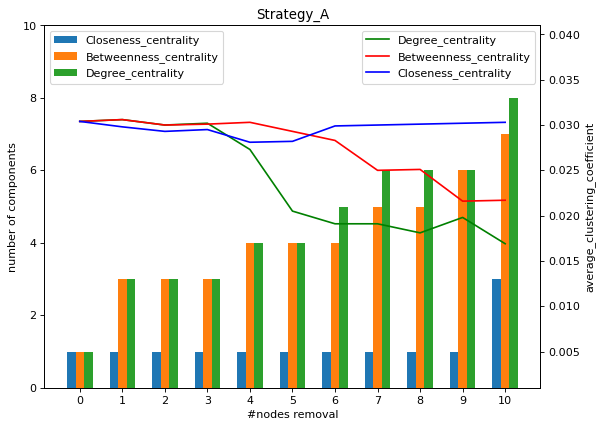

In [178]:
# Import Library
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

# Define Data
index = Results_strategyA.index.values
Degree_centrality = Results_strategyA['A_De_cen_c']
Betweenness_centrality = Results_strategyA['A_Be_cen_c']
Closeness_centrality = Results_strategyA['A_Clo_cen_c']
x_axis = np.arange(len(index))

# Create figure and axis #1
fig, ax1 = plt.subplots(figsize=(8, 6), dpi=80)

# plot bar chart on axis #1
ax1.bar(x_axis -0.2, Closeness_centrality, width=0.2, label = 'Closeness_centrality')
ax1.bar(x_axis     , Betweenness_centrality, width=0.2, label = 'Betweenness_centrality')
ax1.bar(x_axis +0.2, Degree_centrality, width=0.2, label = 'Degree_centrality')
ax1.grid(False) # turn off grid #2
ax1.set_ylabel('number of components')
ax1.set_xlabel('#nodes removal')
ax1.set_ylim(0, 10)
ax1.legend(['Closeness_centrality', 'Betweenness_centrality', 'Degree_centrality'], loc="upper left")


# set up the 2nd axis
ax2 = ax1.twinx()
# plot line chart on axis #2
ax2.plot(x_axis, Results_strategyA['A_De_cen_cc'], color='g', label='Degree_centrality')
ax2.plot(x_axis, Results_strategyA['A_Be_cen_cc'], color='r', label='Betweenness_centrality')
ax2.plot(x_axis, Results_strategyA['A_Clo_cen_cc'], color='b', label='Closeness_centrality')
ax2.set_ylabel('average_clustering_coefficient')
ax2.set_ylim(0.001, 0.041)
ax2.legend(['Degree_centrality', 'Betweenness_centrality', 'Closeness_centrality'], loc="upper right")

plt.xticks(x_axis, index)
plt.title("Strategy_A")
plt.show()
fig.savefig('Results/Strategy_A.png')

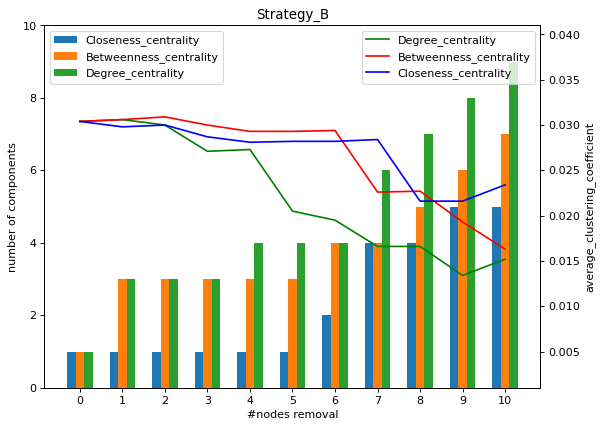

In [179]:
# Define Data
index = Results_strategyB.index.values
Degree_centrality = Results_strategyB['B_De_cen_c']
Betweenness_centrality = Results_strategyB['B_Be_cen_c']
Closeness_centrality = Results_strategyB['B_Clo_cen_c']
x_axis = np.arange(len(index))

# Create figure and axis #1
fig, ax1 = plt.subplots(figsize=(8, 6), dpi=80)

# plot bar chart on axis #1
ax1.bar(x_axis -0.2, Closeness_centrality, width=0.2, label = 'Closeness_centrality')
ax1.bar(x_axis     , Betweenness_centrality, width=0.2, label = 'Betweenness_centrality')
ax1.bar(x_axis +0.2, Degree_centrality, width=0.2, label = 'Degree_centrality')
ax1.grid(False) # turn off grid #2
ax1.set_ylabel('number of components')
ax1.set_xlabel('#nodes removal')
ax1.set_ylim(0, 10)
#ax1.(figsize=(8, 6), dpi=80)
ax1.legend(['Closeness_centrality', 'Betweenness_centrality', 'Degree_centrality'], loc="upper left")


# set up the 2nd axis
ax2 = ax1.twinx()
# plot line chart on axis #2
ax2.plot(x_axis, Results_strategyB['B_De_cen_cc'], color='g', label='Degree_centrality')
ax2.plot(x_axis, Results_strategyB['B_Be_cen_cc'], color='r', label='Betweenness_centrality')
ax2.plot(x_axis, Results_strategyB['B_Clo_cen_cc'], color='b', label='Closeness_centrality')
ax2.set_ylabel('average_clustering_coefficient')
ax2.set_ylim(0.001, 0.041)
ax2.legend(['Degree_centrality', 'Betweenness_centrality', 'Closeness_centrality'], loc="upper right")


#plt.figures(figsize=(10,10))

plt.xticks(x_axis, index)
plt.title("Strategy_B")
plt.show()
fig.savefig('Results/Strategy_B.png')

#### Critically discuss the following: 

Which centrality measure reflects better the importance of a station for the functioning of the underground
- Degree centrality seems a better measure for assessing the importance of a station for the functioning of the underground in London. Because when the top 10 nodes on the degree centrality list been removed, the clustering coefficient decrease the most compare to other centrality measures, from 0.0304 to 0.0169 and 0.0152 in non-sequential removal and sequentia removal respectively. Additionally, Remove the top 10 nodes on degree centrality list would cause the most segregation of the network from 1 component to 8 and 9 components in non-sequential removal and sequentia removal respectively.

which strategy is more effective at studying resilience

* strategy B, because when one node is removed, it not only reduce the number of node and edges in the network of its own, but influence the functioning, efficiency and resilience of other nodes in the network. Therefore, the most influence node in the network may change along the node removal process, it's more accurate to remove in a sequential way to address the changes along with each node removal.

which impact measure is better at assessing the damage after node removal

* From the two impact measure proposed, the number of components in the network is better at assessing the damage after node removal, because you can clearly see how many disconnected components it becomes after each node removal. The disconnected damage is more serious than reducing the connectivity between stations.

## II. Flows: weighted network
In this section, you will include passengers into the underground, and assess whether different measures need to be used when flows are considered. The network to use in this section is the weighted network given to you in the coursework, where the **flows of passengers were assigned to the links between stations**.

### II.1. 
Consider the **centrality measure derived in I.**- indicating the most relevant stations for assessing the vulnerability of the underground. What would you need to do to `adjust this measure for a weighted network`? **Recompute the ranking of the 10 most important nodes** according to this adjusted measure. Do you find the same ones as in I.1?

weighted degree centrality
* No adjustment to degree centrality when include weight of flows in the edge. The degree centrality is calculated regardless of weights, therefore, the result would be the same no matter you put weight of flow to the edge or not. The function of degree centrality only takes into account the number of links attached to the node, not the distance each edges are.
The 10 most important nodes would also be the same since there is nothing changed when we consider weight in degree centrality.
(reference)
so no matter how many passengers passing this edge, the degree centrality only take into account how many stations are attached to the current station in London tube network. The number of neighber linked station sum is regardless of the flow in each edge.

### II.2. 
Now consider the measure for assessing the impact of node removal. Would you adjust the measure for a weighted network? If yes, how? Propose a different measure that would be better at assessing the impact of closing a station taking into consideration the passengers.

In II.2 I am asking you to consider the best performing measure to assess node removal, and to adjust it if it makes sense.

In addition, to propose a new measure that will consider passengers. So now you have 2 measures. The adjusted one, or old one if it cannot be adjusted, and the newly proposed one.

* The best performing measure to assess the impact of node removal is clustering coefficient in this paper. It can be adjusted for a weighted network by adding the weight in the function

* A new measure that will consider passengers is 

### II.3. 
Remove only the highest ranked node according to the best performing centrality measure found in I.1. Evaluate the impact according to the 2 measures in II.2.（you remove 1 node using the best performing centrality measure without flows, that is without weights in the link, and evaluate the effect using the 2 measures in II.2-cc & efficiency ）
In my case, the best performing cnetrality measure is the degree centrality.so below would evaluate the effect using clustering coefficient and 


Repeat the experiment for the highest ranked node using the adjusted measure. If it’s the same node apply it to the second ranked node. Critically discuss which closure will have the largest impact on passengers, referring to your measures and results. （So you ranked your nodes according to this new centrality measure in II.1. Now you remove the highest ranked one, and if it is the same that you just removed, then do the second highest one. And you evaluate again using the 2 measures to assess the effect of node removal, which are NOT the same as the centrality measures.）

So for your question 2. now you see that is the adjusted (or old one if it cannot be adjusted) and the newly proposed one measures to assess the impact that you need to use.

In [180]:
#degree has no weight, so we first change to betweenness centrality
# in order to conduct this experiment
#now calculate the weighted betweenness centrality top10 
v_weights={(e1, e2):(round(1./weight,7)) if weight!=0 else 0 for e1, e2, weight in G.edges(data='flows')}
nx.set_edge_attributes(G, v_weights, 'v_weights')
list(G.edges(data=True))[0:10]

[('Wembley Park',
  'Kingsbury',
  {'length': 2916.7715580506483,
   'line_name': 'Jubilee',
   'flows': 12356,
   'v_weights': 8.09e-05}),
 ('Wembley Park',
  'Neasden',
  {'length': 2353.1659381957816,
   'line_name': 'Jubilee',
   'flows': 6744,
   'v_weights': 0.0001483}),
 ('Wembley Park',
  'Preston Road',
  {'length': 1419.7351657633037,
   'line_name': 'Metropolitan',
   'flows': 36601,
   'v_weights': 2.73e-05}),
 ('Wembley Park',
  'Finchley Road',
  {'length': 7266.37392749648,
   'line_name': 'Metropolitan',
   'flows': 55216,
   'v_weights': 1.81e-05}),
 ('Kingsbury',
  'Queensbury',
  {'length': 1245.9952343630068,
   'line_name': 'Jubilee',
   'flows': 9419,
   'v_weights': 0.0001062}),
 ('Queensbury',
  'Canons Park',
  {'length': 1693.307343195774,
   'line_name': 'Jubilee',
   'flows': 6385,
   'v_weights': 0.0001566}),
 ('Canons Park',
  'Stanmore',
  {'length': 1419.6694762456716,
   'line_name': 'Jubilee',
   'flows': 3624,
   'v_weights': 0.0002759}),
 ('Stratford

In [184]:
bet_london_w=nx.betweenness_centrality(G,weight='v_weights',normalized=False) #not normalizing(not able to compare)
nx.set_node_attributes(G,bet_london_w,'betweenness_w')

# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_w'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w'))

df_sorted = df.sort_values(["betweenness_w"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_w
Green Park,Green Park,44892.50
Bank and Monument,Bank and Monument,39758.50
Waterloo,Waterloo,31904.25
Westminster,Westminster,29664.50
Liverpool Street,Liverpool Street,26530.00
Stratford,Stratford,26125.00
Bond Street,Bond Street,22996.50
Euston,Euston,22314.00
Oxford Circus,Oxford Circus,21207.00
Warren Street,Warren Street,19916.00


In [194]:
### Compare to the Topological betweenness centrality (not adding the weight):
bet_london_t=nx.betweenness_centrality(G, normalized=False)  #not normalized
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

#this is the betweenness rank from I. so we remove the 

,station_name,betweenness_t
Stratford,Stratford,23768.093434
Bank and Monument,Bank and Monument,23181.058947
Liverpool Street,Liverpool Street,21610.387049
King's Cross St. Pancras,King's Cross St. Pancras,20373.521465
Waterloo,Waterloo,19464.882323
Green Park,Green Park,17223.622114
Euston,Euston,16624.275469
Westminster,Westminster,16226.155916
Baker Street,Baker Street,15287.107612
Finchley Road,Finchley Road,13173.758009


#### so we remove the 'Green Park'

In [211]:
# the weighted clustering coefficient before removal
c_w = nx.clustering(G,weight='flows')
print(type(c_w))
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c_w = sorted(c_w.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])
#what is the average clustering coefficient
c_avg_w = sum([i[1] for i in c_w]) / len(c_w)
print(f'avg clustering coefficient before removal: {c_avg_w}')


# the weighted clustering coefficient after removal
#make a copy of G first
#remove the first station in degree centrality rank
#make a copy of the graph
G_w = G.copy()
print(nx.info(G_w))  #before
G_w.remove_node("Green Park")
print(nx.info(G_w))  #after

c_w = nx.clustering(G_w,weight='flows')
print(type(c_w))
# we can sort the dictionary by the clustering coefficient (largest to smallest)
c_w = sorted(c_w.items(), key=lambda pair: pair[1], reverse=True)
print(c[:5])
#what is the average clustering coefficient
c_avg_w = sum([i[1] for i in c_w]) / len(c_w)
print(f'avg clustering coefficient after removal: {c_avg_w}')

<class 'dict'>
[('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0), ('Piccadilly Circus', 1.0)]
avg clustering coefficient before removal: 0.0015791877116043114
Graph with 401 nodes and 467 edges
Graph with 400 nodes and 461 edges
<class 'dict'>
[('Chiswick Park', 1.0), ('Star Lane', 1.0), ('Mornington Crescent', 1.0), ('Marylebone', 1.0), ('Piccadilly Circus', 1.0)]
avg clustering coefficient after removal: 0.001318147547008999


In [218]:
# weighted average_shortest_path_length before removal:
print(nx.average_shortest_path_length(G, weight='flows'))
#after removal
print(nx.average_shortest_path_length(G_w, weight='flows'))

255693.32300498753
257459.25845864663


# Part 2: Spatial Interaction models
For this section, you will be given a “symbolic” population and the number of jobs for the stations in the underground. You will also be given the number of people that commute from one station to another, through an OD matrix.

## III. Models and calibration

### III.1. 
Briefly introduce the spatial interaction models covered in the lectures using equations and defining the terms, taking particular care in explaining the role of the parameters.

### III.2. 
Using the information of population, jobs and flows, select a spatial interaction model and calibrate the parameter beta. Make sure to justify your selection of model.

\begin{equation} \tag{2}
T_{ij} = k O_i^\alpha  D_j^\gamma  d_{ij}^{-\beta}
\end{equation}

#### The unconstrained(Basic gravity model) model
is chosen to calibrate the parameter beta when using the information of population, jobs and flows.
gravity interaction models have shown themselves to be very useful for fitting data and thus provide a simple way to make predictions about the impact of certain policies.

In [222]:
#load the OD data
OD_data = pd.read_csv('london_flows.csv')

In [223]:
OD_data.head(2)

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774


In [224]:
OD_data["TotalNoIntra"] = OD_data.apply(lambda x: 0 if x['station_origin'] == x['station_destination'] else x['flows'], axis=1)

In [225]:
import numpy as np
#now we can create a pivot table to turn paired list into a matrix, and compute the margin as well
cdatamat = pd.pivot_table(OD_data, values ="TotalNoIntra", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatamat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [226]:
OD_data = OD_data[(OD_data[['flows','population','jobs']] != 0).all(axis=1)]
OD_data

,station_origin,station_destination,flows,population,jobs,distance,TotalNoIntra
1,Abbey Road,Beckton,1,599,442,8510.121774,1
2,Abbey Road,Blackwall,3,599,665,3775.448872,3
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,1
4,Abbey Road,Canning Town,37,599,15428,2228.923167,37
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,1
...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,127
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,608
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,6
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,81


In [231]:
cdatamat = pd.pivot_table(OD_data, values ="TotalNoIntra", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatamat.to_csv("cdatamat.csv")
cdatamat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,NaN,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,NaN,NaN,NaN,NaN,3745
Aldgate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,...,NaN,NaN,4.0,8.0,NaN,NaN,NaN,NaN,NaN,2886
Aldgate East,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,...,24.0,NaN,NaN,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,NaN,NaN,NaN,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3093


\begin{equation} \tag{2}
T_{ij} = k O_i^\alpha  D_j^\gamma  d_{ij}^{-\beta}
\end{equation}

In [232]:
#set up some variables to hold our parameter values in (starting parameters to our flow estimates):
alpha = 1
gamma = 1
beta = 2
k = 1
T2 = sum(OD_data["flows"]) #T2 is the sum of total flows in our model.

In [233]:
# **: exponentiation, these code refer to the above gravity model
from numpy import inf
from numpy import nan

Oi1_alpha = OD_data["population"]**alpha
Dj2_gamma = OD_data["jobs"]**gamma
dist_beta = OD_data["distance"]**-beta
T1 = Oi1_alpha*Dj2_gamma*dist_beta
T1 = T1.replace([np.inf, -np.inf], np.nan) 
T1 = T1.dropna()
#OD_data = OD_data.replace([np.inf, -np.inf], np.nan) 
#OD_data = OD_data.dropna()

k = T2/sum(T1)

#OD_data = OD_data.replace(np.inf, np.nan)
#OD_data = OD_data.replace(np.nan, np.nan_to_num(0.0000000000001))
#OD_data = OD_data.np.nan_to_num(0.0000000000001)
#OD_data = OD_data.fillna(0)
#cdata1 = cdata1.dropna()

print(sum(T1))
print(T2)
print(k)

113003.50029207232
1542391
13.649055082484072


In [234]:
#Then, just as in Equation 2 above, just multiply everything together to get your flow estimates.
#run the model and store of the new flow estimates in a new column
OD_data["unconstrainedEst1"] = round(k*Oi1_alpha*Dj2_gamma*dist_beta, 0)

OD_data = OD_data.replace(np.inf, np.nan)
OD_data = OD_data.dropna()
#convert to integers
OD_data["unconstrainedEst1"] = OD_data["unconstrainedEst1"].astype(int)

sum(OD_data["unconstrainedEst1"])   

#so the sum of flows shoule be the same with previous data 'cdatasubmat'
#but not the same 1542283 vs. 1540323 now

1540323

In [235]:
#these are our Estimate Matrix
cdatamat1 = OD_data.pivot_table(values ="unconstrainedEst1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatamat1

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,559
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50
Acton Town,NaN,NaN,NaN,1.0,1.0,NaN,2.0,NaN,NaN,2.0,...,1.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,596
Aldgate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,...,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,9752
Aldgate East,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,...,1.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,7908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,2.0,3.0,NaN,NaN,NaN,NaN,2.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,329
Woodgrange Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
Woodside Park,NaN,NaN,0.0,1.0,1.0,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216


In [236]:
cdatamat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,NaN,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,NaN,NaN,NaN,NaN,3745
Aldgate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,...,NaN,NaN,4.0,8.0,NaN,NaN,NaN,NaN,NaN,2886
Aldgate East,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,...,24.0,NaN,NaN,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,NaN,NaN,NaN,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3093


**Then** testing the "Goodness-of-fit" of default parameters in Gravity model (when alpha = 1; gamma = 1; beta = 2; k = 1)


In [237]:
import scipy.stats

def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

print(f'R2 result:{CalcRSqaured(OD_data["flows"], OD_data["unconstrainedEst1"])}')

from math import sqrt

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE


print(f'RMSE result:{CalcRMSE(OD_data["flows"], OD_data["unconstrainedEst1"])}')


R2 result:0.033816925145303
RMSE result:582.023


Now, we **calibrate the beta** to see if there is any improvement of the model

**re-specify Equation as a Poisson Regression model**

\begin{equation} \tag{2}
\lambda_{ij} = \exp (K + \alpha \ln O_i + \gamma \ln D_j - \beta \ln d_{ij})
\end{equation}

**Now we have Equation 2** at our disposal, **we can use a Poisson regression model to produce estimated of $k$, $\alpha$, $\gamma$ and $\beta$** - or put another way, **we can Use the rgeression model to calibrate our parameters.**

In [33]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#remove all 0 values (logarithms can't deal with 0 values)
OD_data = OD_data[(OD_data!=0).all(1)]

#take the variables and produce logarithms of them (take logarithms of our variables)
x_variables = ["population", "jobs", "distance"]
log_x_vars = []
for x in x_variables:
    OD_data[f"log_{x}"] = np.log(OD_data[x])
    log_x_vars.append(f"log_{x}")

#create the formula
formula = 'flows ~ log_population + log_jobs + log_distance'

#run the regression
uncosim = smf.glm(formula = formula, 
                  data=OD_data, 
                  family=sm.families.Poisson()).fit()  

In [34]:
#extract the summary of the constrained model
print(uncosim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                26490
Model:                            GLM   Df Residuals:                    26486
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0531e+06
Date:                Sun, 01 May 2022   Deviance:                   1.9854e+06
Time:                        21:31:05   Pearson chi2:                 3.68e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.6317      0.014   -253.

In [36]:
#first assign the parameter values from the model to the appropriate variables
K = uncosim.params[0]   #k never be negative
alpha = uncosim.params[1]
gamma = uncosim.params[2]
beta = -uncosim.params[3]

#now plug everything back into the Equation 2 model ... 
#be careful with the negative signing of the parameter beta
OD_data["unconstrainedEst2"] = np.exp(K 
                                       + alpha*OD_data["log_population"] 
                                       + gamma*OD_data["log_jobs"] 
                                       - beta*OD_data["log_distance"])

#or we can just extract the results from the actual poisson regression and apply them to the data
predictions = uncosim.get_prediction()
predictions_summary_frame = predictions.summary_frame()
OD_data["fitted"] = predictions_summary_frame["mean"]

In [38]:
beta

0.5580649638450205

In [37]:
#round the numbers so that we don't get a half of a person
OD_data["unconstrainedEst2"] = round(OD_data["unconstrainedEst2"], 0)
#convert to integers
OD_data["unconstrainedEst2"] = OD_data["unconstrainedEst2"].astype(int)
#check that the sum of these estimates make sense
sum(OD_data["unconstrainedEst2"])   #Yes, 93803 flows

1445730

In [39]:
#turn it into a little matrix and have a look at your handy work
cdatamat2 = OD_data.pivot_table(values ="unconstrainedEst2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatamat2

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Anerley,Angel,Archway,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,297
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211
Acton Town,NaN,NaN,NaN,25.0,25.0,NaN,9.0,NaN,26.0,NaN,...,22.0,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,3771
Aldgate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,11.0,...,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,5005
Aldgate East,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,12.0,...,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,NaN,31.0,33.0,NaN,NaN,NaN,29.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3372
Woodgrange Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
Woodside Park,NaN,NaN,NaN,21.0,21.0,NaN,NaN,NaN,24.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2441


In [40]:
#calculate the R^2
#calculate RMSE
print(f'R2 result:{CalcRSqaured(OD_data["flows"], OD_data["unconstrainedEst2"])}')

print(f'RMSE result:{CalcRMSE(OD_data["flows"], OD_data["unconstrainedEst2"])}')


R2 result:0.30544768160066277
RMSE result:163.726


#### or 

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
#set out all the fomrulas     np.log(Oi1_origpop) =? log_Oi1_origpop
formula1 = "flows ~ np.log(population) + np.log(jobs) + np.log(distance) -1"
formula2 = "flows ~ station_origin + np.log(jobs) + np.log(distance) -1"
formula3 = "flows ~ np.log(population) + station_destination + np.log(distance) -1"
formula4 = "flows ~ station_origin + station_destination + np.log(distance) -1"
formula5 = "flows ~ np.log(population) + np.log(jobs) + distance -1"
formula6 = "flows ~ station_origin + np.log(jobs) + distance -1"
formula7 = "flows ~ np.log(population) + station_destination + distance -1"
formula8 = "flows ~ station_origin + station_destination + distance -1"

#create a list of all the formulas
formulas = [formula1, formula2, formula3, formula4, 
            formula5, formula6, formula7, formula8]

#list the models name
models = ["uncosim_pow", "prodsim_pow", "attrsim_pow", "doublesim_pow",
         "uncosim_exp", "prodsim_exp", "attrsim_exp", "doublesim_exp"]

#create a set of tuples to store whether a paramater
#will be in the model or not
model_params = [(True, True, True),
               (False, True, True),
               (True, False, True),
               (False, False, True),
               (True, True, True),
               (False, True, True),
               (True, False, True),
               (False, False, True)]

#create an ampty dictionary to store the results
results = {"Model":models,
          "R2": [],
          "RMSE": [],
          "Alpha":[],
          "Gamma":[],
          "Beta":[]}

#loop over each formula
for i, formula in enumerate(formulas):
    
    #run the specified model
    sim = smf.glm(formula = formula, 
                 data = OD_data,
                 family = sm.families.Poisson()).fit()
    #clauclate the estimates
    OD_data[models[i]] = sim.mu
    
    #if the alpha paramater is true
    if model_params[i][0] == True:
        
        #if there are three params then it will be 
        #in the third position
        if sum(model_params[i]) == 3:
            
            results["Alpha"].append(sim.params[-3])
            
        #otherwise it will be in the second paramater
        else:
            results["Alpha"].append(sim.params[-2])
            
    #if not then just append nan
    else:
        results["Alpha"].append(np.nan) 
    
    #if the gamma paramater is True
    #then it will always be the second paramater
    if model_params[i][1] == True:
        results["Gamma"].append(sim.params[-2])
    #otherwise add nan
    else:
        results["Gamma"].append(np.nan)
    
    #add the beta to the results (always will be there)
    results["Beta"].append(sim.params[-1])
        
    #add the metrics to the results dictionary
    results["R2"].append(CalcRSqaured(OD_data["flows"],OD_data[models[i]]))
    results["RMSE"].append(CalcRMSE(OD_data["flows"],OD_data[models[i]]))

#create a dataframe from the results
results = pd.DataFrame(results)
#print the results
results

In [ ]:
#extract the summary of the constrained model
print(uncosim.summary())

## IV. Scenarios
### IV.1. 
Scenario A: assume that Canary Wharf has a 50% decrease in jobs after Brexit. Using the calibrated parameter beta, compute the new flows for scenario A. Make sure the number of commuters is conserved.

#### Production-constrained Model

\begin{equation} \tag{4}
\lambda_{ij} = \exp (\alpha_i + \gamma \ln D_j - \beta \ln d_{ij})
\end{equation}

calibrate the parameters first

In [ ]:
#create the formula (the "-1" indicates no intercept in the regression model).
#we just shape dummy variables with values
formula = 'flows ~ station_origin + log_jobs + log_distance-1'
#run a production constrained sim
prodSim = smf.glm(formula = formula, data=OD_data, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(prodSim.summary())
#this is more complicated process, so when you have a large dataset, you may not be able to run it.
#Therefore, DON'T intend to use exponential function (log_distance-1) when you have a large datset.

In [ ]:
#recalculate our Oi & Dj

#create some Oi and Dj columns in the dataframe and store row and column totals in them:
#to create O_i, take cdatasub ...then... group by origcodenew ...then... summarise by calculating the sum of Total
O_i = pd.DataFrame(OD_data.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
OD_data = OD_data.merge(O_i, on = "station_origin", how = "left" ) #merge back to our origin dataset, then it have Oi column

#same process to Dj
D_j = pd.DataFrame(OD_data.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
OD_data = OD_data.merge(D_j, on = "station_destination", how = "left" )

In [ ]:
#We can do this by pulling out the parameter values
coefs = pd.DataFrame(prodSim.params)  #extract the parameter from proSim regression model
coefs.reset_index(inplace=True) #to ensure we have them in the right order
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)

#to replace to the [] for all of them
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
    
#then once you have done this you can join them back into the dataframes
OD_data = OD_data.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
OD_data.drop(columns = ["coef"], inplace = True)

#check this has worked
OD_data.head()
#this aplha_i isn't the true value, but the coefficient estimated by the object

In [ ]:
#you count the index of the coefficient from the previous Possion regression outputs
#starting with 0, 1, 2... from up to down in the coefficient outputs
alpha_i = prodSim.params[0:395]
gamma = prodSim.params[395]
beta = -prodSim.params[396]

In [ ]:
alpha_i

In [ ]:
gamma

In [ ]:
beta

In [ ]:
OD_data["prodsimest1"] = np.exp(OD_data["alpha_i"]+gamma*OD_data["log_jobs"] 
                                 - beta*OD_data["log_distance"])
#or you could do it the easy way like we did last week with the fitted column (See previous practical)
OD_data.head(10)

In [ ]:
#first round the estimates
OD_data["prodsimest1"] = round(OD_data["prodsimest1"],0)
cdatamat3 = OD_data.pivot_table(values ="prodsimest1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatamat3

In [ ]:
print(f'R2 result:{CalcRSqaured(OD_data["flows"], OD_data["prodsimest1"])}')

print(f'RMSE result:{CalcRMSE(OD_data["flows"], OD_data["prodsimest1"])}')

#### or just extract the result from the table including all models with two different cost functions.

#### A 'what if...' scenario

In [ ]:
def new_jobs(row):
    if row["station_destination"] == "Canary Wharf":
        val = 0.5*row["jobs"]
    else:
        val = row["jobs"]
    return val

OD_data["jobs_scenarioA"] = OD_data.apply(new_jobs, axis =1)
OD_data.head(3)
#you can see the destination jobs of Canary Wharf changed, others remains the same

In [ ]:
# gamma * new destination jobs, others are the same as previously
OD_data["prodsimest2"] = np.exp(OD_data["alpha_i"]+gamma*np.log(OD_data["jobs_scenarioA"]) - beta*OD_data["log_distance"])

OD_data["prodsimest2"] = round(OD_data["prodsimest2"],0)
#now we can convert the pivot table into a matrix
cdatamat4 = OD_data.pivot_table(values ="prodsimest2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatamat4

In [ ]:
print(f'R2 result:{CalcRSqaured(OD_data["flows"], OD_data["prodsimest2"])}')

print(f'RMSE result:{CalcRMSE(OD_data["flows"], OD_data["prodsimest2"])}')

You will notice that by decreasing the jobs in Canary Wharf, we’ve decreased flows into Canary Wharf, but have not increased the flows into other stations - the original constraints are still working on the other stations. One way to get around this, now that we have calibrated our parameters, is to return to the multiplicative model in Equation 1 and run this model after calculating our own  balancing factors.

\begin{equation} \tag{1}
T_{ij} = A_i O_i  D_j^\gamma  d_{ij}^{-\beta}
\end{equation}

\begin{equation} \tag{3}
A_i = \frac{1}{\sum_j D_j^\gamma d_{ij}^{-\beta}}
\end{equation}

In [ ]:
#calculate our own Ai using the original destination jobs
#we want to estimate the original alpha value in order to get the exact flows that you got from 
#our calibrated model

#calculate some new wj^alpha and d_ij^beta values 
Dj2_gamma = OD_data["jobs"]**gamma   #new column of: Dj^gamma for each destinations
dist_beta = OD_data["distance"]**(-beta)  #calculate distances through the origi-destination path

#calcualte the first stage of the Ai values
OD_data["Ai1"] = Dj2_gamma * dist_beta

#now do the sum over all js bit (sum over destinations)
A_i = pd.DataFrame(OD_data.groupby(["station_origin"])["Ai1"].agg(np.sum))

#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i"}, inplace=True)

#and write the A_i values back into the dataframe
OD_data = OD_data.merge(A_i, left_on="station_origin", right_index=True, how="left") 

In [ ]:
#what it look like
OD_data[["station_origin", "A_i"]].sample(5)
#now each Origin has its calculated A_i that you can reuse in the origin formula.

So that is it for calculating your $A_i$ values. **Now** you have these, it’s very simple to **plug everything back into Equation 1** and **Generate some estimates**…

\begin{equation} \tag{1}
T_{ij} = A_i O_i  D_j^\gamma  d_{ij}^{-\beta}
\end{equation}

In [ ]:
#to check everything works, recreate the original estimates
OD_data["prodsimest3"] = OD_data["A_i"]*OD_data["O_i"]*Dj2_gamma*dist_beta
#round
OD_data["prodsimest3"] = round(OD_data["prodsimest3"])
#check
OD_data[["prodsimest1", "prodsimest3"]]

You should see that your new estimates are exactly the same as your first estimates. If they’re not, then something has gone wrong. Now we have this though, we can keep messing around with some new estimates and keep the constraints. Remember, though, that you will need to recalculate $A_i$ each time you want to create a new set of estimates. Let’s try with our new values for the destination salary in Barking and Dagenham

In [ ]:
#repeating the process with our new destination jobs in Canary Wharf

#calculate some new wj^alpha and d_ij^beta values
Dj3_gamma = OD_data["jobs_scenarioA"]**gamma
#calcualte the first stage of the Ai values
OD_data["Ai1"] = Dj3_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(OD_data.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i2"}, inplace=True)
#and write the A_i values back into the dataframe
OD_data = OD_data.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [ ]:
OD_data[["station_origin", "A_i", "A_i2"]].sample(5)
#it should only be slightly differnce

Now we have some new $A_i$'s, let's generate some new scenario flow estimates...

In [ ]:
#to check everything works, recreate the original estimates
OD_data["prodsimest4"] = OD_data["A_i2"]*OD_data["O_i"]*Dj3_gamma*dist_beta
#round
OD_data["prodsimest4"] = round(OD_data["prodsimest4"])

In [ ]:
#have a look
cdatamat5 = OD_data.pivot_table(values ="prodsimest4", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatamat5
#mine total flows still different, but slightly (original total flow of 93802)

In [ ]:
print(f'R2 result:{CalcRSqaured(OD_data["flows"], OD_data["prodsimest4"])}')

print(f'RMSE result:{CalcRMSE(OD_data["flows"], OD_data["prodsimest4"])}')

In [ ]:
#check
OD_data[["prodsimest1", "prodsimest3","prodsimest4"]]

In [ ]:
#Canary Wharf changes
print(sum(OD_data["prodsimest4"])-sum(OD_data["prodsimest3"]))

In [ ]:
#plot for the SA
diff_sa = OD_data.groupby('station_origin',as_index=False).agg({'prodsimest3':'sum','prodsimest4':'sum'})
diff_sa["diff"]= diff_sa["prodsimest4"] - diff_sa["prodsimest3"]

diff_sa["diff_abs"]= abs(diff_sa["diff"])
diff_sa.sort_values(by=["diff_abs"],ascending= False, inplace = True)
diff_A = diff_sa.head(31)
diff_A

In [ ]:
#plot for the Scenario A
fig, ax = plt.subplots(1,1,figsize=(12,5))
fig.suptitle("Scenario A: Change in Station In Flows after Brexit (Apart from Canary Wharf)") #Decrease in Canary Wharf's jobs
ax.plot(list(diff_A['diff'])[0:], color = "blue", label = 'Change in In Flows') 
ax.grid(color='grey', linestyle='--',alpha=0.3) 
ax.set_xlabel("Affected Stations") 
ax.set_ylabel("Change in In Flows")   
ax.set_xticks(list(range(31))) 
ax.set_xticklabels(list(diff_A['station_origin'])[0:], rotation=90)
ax.legend(loc=1)
ax.set_title('Top 30 Changes in In Flows')
plt.show()

### IV.2. 
Scenario B: assume that there is a significant increase in the cost of transport. Select 2 values for the parameter in the cost function reflecting scenario B. Recompute the distribution of flows.

#### Doubly Constrained Model
we choose the doubly constrained model which make O,D,total flows all fixed. This can make the station flow changes and distributions easily detected and analyse.

\begin{equation} \tag{9}
T_{ij} = A_i B_j O_i D_j d_{ij}^{-\beta}
\end{equation}

\begin{equation} \tag{14}
\lambda_{ij} = \exp (\alpha_i + \gamma_j -\beta \ln d_{ij})
\end{equation}

In [ ]:
#create the formula (the "-1" indicates no intercept in the regression model).
dbl_form = 'flows ~ station_destination + station_origin + log_distance-1'
#run a doubly constrained sim
doubSim = smf.glm(formula = dbl_form, data=OD_data, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(doubSim.summary())

In [ ]:
#get the estimates (extract our flows from data)
OD_data["doubsimfitted"] = np.round(doubSim.mu)
#here's the matrix
cdatamat6 = OD_data.pivot_table(values ="doubsimfitted", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
cdatamat6

In [ ]:
print(f'R2 result:{CalcRSqaured(OD_data["flows"], OD_data["doubsimfitted"])}')

print(f'RMSE result:{CalcRMSE(OD_data["flows"], OD_data["doubsimfitted"])}')

#### doubly constrained SIM with Distance Decay cost function

In [ ]:
# Run a doubly constrained SIM with a Inverse Power cost function.
# the Distance Decay parameter (power law)
doubsim_form1 = "flows ~ station_origin + station_destination + log_distance -1"
doubsim_ip = smf.glm(formula=doubsim_form1, data = OD_data, family = sm.families.Poisson()).fit()
print(doubsim_ip.summary())

In [ ]:
#Inverse Power
#get the estimates (extract our flows from data)
OD_data["doubsimfitted_ip"] = np.round(doubsim_ip.mu,0)

#here's the matrix
cdatamat7 = OD_data.pivot_table(values ="doubsimfitted_ip", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
cdatamat7

In [ ]:
# Run a doubly constrained SIM with a negative exponential cost function.
#Now:
doubsim_form2 = "flows ~ station_origin + station_destination + distance -1"
doubsim_exp = smf.glm(formula=doubsim_form2, data = OD_data, family = sm.families.Poisson()).fit()
print(doubsim_exp.summary())

#this is more complicated process, so when you have a large dataset, you may not be able to run it.
#Therefore, DON'T intend to use exponential function when you have a large datset.

In [ ]:
#negative exponential
#get the estimates (extract our flows from data)
OD_data["doubsimfitted_exp"] = np.round(doubsim_exp.mu,0)

#here's the matrix
cdatamat8 = OD_data.pivot_table(values ="doubsimfitted_exp", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
cdatamat8

In [ ]:
print(f'IP R2 result:{CalcRSqaured(OD_data["flows"], OD_data["doubsimfitted_ip"])}')
print(f'IP RMSE result:{CalcRMSE(OD_data["flows"], OD_data["doubsimfitted_ip"])}')

print(f'EXP R2 result:{CalcRSqaured(OD_data["flows"], OD_data["doubsimfitted_exp"])}')
print(f'EXP RMSE result:{CalcRMSE(OD_data["flows"], OD_data["doubsimfitted_exp"])}')

In [ ]:
# Here is the entropy maximising approach for a known beta.
# Plug in the required values in this function to solve.

def balance_doubly_constrained(pd, orig_field, dest_field, Oi_field, Dj_field, cij_field, beta, 
                               cost_function, Ai_name = "Ai_new", Bj_name = "Bj_new", converge=0.001):
    # Define some variables
    Oi = pd[[orig_field, Oi_field]]
    Dj = pd[[dest_field,Dj_field]]    
    if cost_function.lower() in ['power','pow']:
        beta_cij = np.exp(beta * np.log(pd[cij_field]))
    elif cost_function.lower() in ['exponential','exp']:
        beta_cij = np.exp(beta * pd[cij_field])
    else:
        return "Cost function not specified properly, use 'exp' or 'pow'"
    
    # Create some helper variables
    cnvg = 1
    iteration = 0
    # Now iteratively rebalance the Ai and Bj terms until convergence
    while cnvg > converge:
        if iteration == 0:
            # This first condition sets starting values for Ai and Bj
            # NB sets starting value of Ai assuming Bj is a vector of 1s.
            # We've already established beta_cij with the appropriate cost function, so...
            Oi = Oi.assign(Ai = Dj[Dj_field] * beta_cij)
            # Aggregate Ai and take inverse
            Ai = 1.0/Oi.groupby(orig_field)['Ai'].sum().to_frame()
            # Merge new Ais 
            Oi = Oi.merge(Ai,left_on = orig_field, right_index = True, suffixes = ('','_old'))
            # Drop the temporary Ai field we created, leaving Ai_old
            Oi.drop('Ai', axis=1, inplace=True)
            
            # Now set up Bjs using starting values of Ai
            Dj = Dj.assign(Bj = Oi['Ai_old'] * Oi[Oi_field] * beta_cij)
            # Aggregate Bj and take inverse
            Bj = 1.0/Dj.groupby(dest_field)['Bj'].sum().to_frame()
            # Merge new Bjs
            Dj = Dj.merge(Bj,left_on = dest_field, right_index = True, suffixes = ('','_old'))
            # Drop the temporary Bj field we created, leaving Bj_old
            Dj.drop('Bj', axis=1, inplace=True)
            
            # Increment loop
            iteration += 1
        else:
            # This bit is the iterated bit of the loop which refines the values of Ai and Bj
            # First Ai
            Oi['Ai'] = Dj['Bj_old'] * Dj[Dj_field] * beta_cij
            # Aggregate Ai and take inverse
            Ai = 1.0/Oi.groupby(orig_field)['Ai'].sum().to_frame()
            # Drop temporary Ai
            Oi.drop('Ai', axis=1, inplace=True)
            # Merge new Ais 
            Oi = Oi.merge(Ai,left_on = orig_field, right_index = True)
            # Calculate the difference between old and new Ais
            Oi['diff'] = np.absolute((Oi['Ai_old'] - Oi['Ai'])/Oi['Ai_old'])
            # Set new Ais to Ai_old
            Oi['Ai_old'] = Oi['Ai']
            # Drop the temporary Ai field we created, leaving Ai_old
            Oi.drop('Ai', axis=1, inplace=True)
            
            # Then Bj
            Dj['Bj'] = Oi['Ai_old'] * Oi[Oi_field] * beta_cij
            # Aggregate Bj and take inverse
            Bj = 1.0/Dj.groupby(dest_field)['Bj'].sum().to_frame()
            # Drop temporary Bj
            Dj.drop('Bj', axis=1, inplace=True)
            # Merge new Bjs
            Dj = Dj.merge(Bj,left_on = dest_field, right_index = True)
            # Calculate the difference between old and new Bjs
            Dj['diff'] = np.absolute((Dj['Bj_old'] - Dj['Bj'])/Dj['Bj_old'])
            # Set new Bjs to Bj_old
            Dj['Bj_old'] = Dj['Bj']
            # Drop the temporary Bj field we created, leaving Bj_old
            Dj.drop('Bj', axis=1, inplace=True)
            
            # Assign higher sum difference from Ai or Bj to cnvg
            cnvg = np.maximum(Oi['diff'].sum(),Dj['diff'].sum())
            
            # Print and increment loop
            print("Iteration:", iteration)
            iteration += 1

    # When the while loop finishes add the computed Ai_old and Bj_old to the dataframe and return
    pd[Ai_name] = Oi['Ai_old']
    pd[Bj_name] = Dj['Bj_old']
    return pd


#phillip didn't explain these cell built by previous years student
#just run it

In [ ]:
# Use the beta we got from the inverse power model
beta = -doubsim_ip.params[-1]
# Get the balancing factors.
OD_data = balance_doubly_constrained(OD_data,'station_origin','station_destination','O_i','D_j','distance',-beta,'power')

# Now predict the model again using the new Ai and Dj fields.
OD_data['SIM_est_pow'] = np.round(OD_data['O_i'] * OD_data['Ai_new'] * OD_data['D_j'] * OD_data['Bj_new'] * 
                                   np.exp(np.log(OD_data['distance'])*-beta))
# Check out the matrix
pd.pivot_table(OD_data,values='SIM_est_pow',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)

In [25]:
# Use the beta we got from the negative exponential model
beta = -doubsim_exp.params[-1]
# Get the balancing factors. NB Setting of new field names for Ai and Bj.
OD_data = balance_doubly_constrained(OD_data,'station_origin','station_destination','O_i','D_j','distance',-beta,'exponential','Ai_exp','Bj_exp')

# Now predict the model again using the new Ai and Dj fields.
OD_data['SIM_est_exp'] = np.round(OD_data['O_i'] * OD_data['Ai_exp'] * OD_data['D_j'] * OD_data['Bj_exp'] * 
                                   np.exp(OD_data['distance']*-beta))
# Check out the matrix
pd.pivot_table(OD_data,values='SIM_est_exp',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6


Dest,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,All
Orig,,,,,,,,
Barking and Dagenham,0,261,713,98,387,1110,3106,5675.0
Barnet,17,0,31,5274,66,13108,6966,25462.0
Bexley,490,324,0,178,4664,1986,7043,14685.0
Brent,6,5052,16,0,57,8719,4658,18508.0
Bromley,148,392,2597,353,0,3057,10784,17331.0
Camden,11,2054,29,1426,81,0,8168,11769.0
City of London,1,39,4,27,10,290,0,371.0
All,673,8122,3390,7356,5265,28270,40725,93801.0


In [ ]:
#B1 changes
print(sum(OD_data["doubsimfitted_exp"])-sum(OD_data["doubsimfitted"]))

In [ ]:
#check
OD_data[["doubsimfitted", "doubsimfitted_ip","doubsimfitted_exp"]]

In [ ]:
#plot for the Sb1
diff_sb1 = OD_data.groupby('station_origin',as_index=False).agg({'doubsimfitted_ip':'sum','doubsimfitted':'sum'})
diff_sb1["diff"]= diff_sb1["doubsimfitted_ip"] - diff_sb1["doubsimfitted"]
#prodsimestsb2
diff_sb1["diff_abs"]= abs(diff_sb1["diff"])
diff_sb1.sort_values(by=["diff_abs"],ascending= False, inplace = True)
diff_sb1 = diff_sb1.head(30)
diff_sb1

In [ ]:
#plot for the Sb
diff_sb2 = OD_data.groupby('station_origin',as_index=False).agg({'doubsimfitted_ip':'sum','doubsimfitted_exp':'sum'})
diff_sb2["diff"]= diff_sb2["doubsimfitted_exp"] - diff_sb2["doubsimfitted_ip"]
#prodsimestsb2
diff_sb2["diff_abs"]= abs(diff_sb2["diff"])
diff_sb2.sort_values(by=["diff_abs"],ascending= False, inplace = True)
diff_sb2 = diff_sb2.head(30)
diff_sb2

### IV.3. 
Using plots, comment on the change in flows obtained for the 3 different situations: scenario A, and scenario B with two selections of parameters. Which scenario would have more impact in the redistribution of flows? Explain and justify your answers using the results of the analysis.